## PREDICTIVE ANAYSIS IN PROPERTY VALUATION.

**The Outliers Team Members**

1.Wallace Ouma 

2.Kenneth Gakuru

3.Ian Odhiambo

4.George Mbugua

5.Fanice Andayi

6.Brenda Ngigi

7.Vincent Kiplangat

8.Jonquil Phelan

9.Charles Gaithuma

## A)INTRODUCTION
In the dynamic landscape of real estate, the ability to provide clients with accurate and data-driven insights is crucial for success. Real estate agencies play a pivotal role in guiding homeowners through key decisions such as
buying, selling, or renting properties. Some of the key decisions that real estate agencies assist homeowners with include:pricing strategies,Market trends and analysis and property inspections. The aim of this project is to empower real estate agencies with a powerful tool – a regression-based model – that can predict the potential increase in property value based on various features influenced by property characteristics such as number of bedrooms,year built,Number of floors in the home,Total living space area in square feet, Overall condition of the home and the location of the home. By leveraging this model, agencies can offer tailored advice to their clients, ensuring informed decisions that maximize the return on investment in the competitive real estate market.

## B)BACKGROUND OF THE DATA
The housing market in King County, Washington, has a rich history and has experienced significant growth and changes over the years. King County is situated in the northwestern part of the United States and encompasses the city of Seattle, which is a major economic and cultural hub in the region.
As the region's economy thrived, King County experienced substantial population growth. This influx of residents led to increased demand for housing, both in urban and suburban areas. Seattle, with its iconic skyline, became a sought-after destination for tech professionals and urban enthusiasts.The real estate market in King County is known for its competitiveness.The region's diverse neighborhoods offer a range of housing options, from historic homes in older districts to modern developments in suburban areas.

## C)PROBLEM STATEMENT

**What is the prevailing circumstance?**
In identifying the prevailing circumstance, real estate agencies wrestle with the ongoing challenge of delivering insightful guidance to clients regarding pricing strategies,Market trends and analysis and property inspections. Clients frequently seek advice on buying, selling, or renting properties. The complexity arises from the multitude of factors influencing property value, making it challenging to accurately quantify the best price for a particular property.

**What problem are we trying to solve?**
The problem at hand revolves around the need for a comprehensive and precise solution to guide real estate agencies in offering informed recommendations to their clients. To tackle this challenge, this project is centered on the development of a regression-based approach, leveraging the King County House Sales dataset. Through this approach, the objective is to construct a robust predictive model that takes into account various features, including property size, condition, location, and more. This model is designed to empower real estate agencies in providing evidence-based insights, pinpointing the property features most likely to yield a substantial return on investment.

**How the project aims to solve the problem?**
In essence, this project aims to equip real estate agencies with a valuable tool that goes beyond enhancing advisory capabilities—it positions them as trusted partners in their clients' real estate journeys. By developing and implementing the regression model, this project strives to optimize property value and contribute to the overall success of real estate agencies, solidifying their client-centric approach in the dynamic real estate landscape.

## D) OBJECTIVES
**Main Objective:**

The main objective of this project is to develop a predictive regression model that assists real estate agencies in advising clients on house prices. The model aims to predict the potential variation in property value based on property characteristics, providing valuable insights to guide clients in making informed decisions about their investments.

**Specific Objectives**

i). Identify Key Factors Influencing House Prices in King County, California, to provide valuable insights for precise pricing strategies.

ii). Analyze Model Performance using metrics such as mean squared error, R-squared values, and residual analysis to gauge the model's effectiveness.

iii). Provide Actionable Recommendations to the Real Estate Agency for improving profitability and market presence, leveraging insights from the model.

## E)NOTEBOOK STRUCTURE
1.Overview

2.Business Understanding

3.Data Understanding

4.Data Cleaning

5.Statistical Analysis

6.Data Preparation

7.Modelling

8.Regression Results

9.Conclusion - Recommendations,Limitations and Next Steps

## 1.OVERVIEW
This project is centered on the development of a multiple linear regression model with the primary objective of predicting property prices in the real estate market. The focal point of this analysis is the dependent variable, "price," while the independent variables encompass a comprehensive range of property characteristics. These characteristics include, but are not limited to, the number of bedrooms, year built, number of floors in the home, total living space area in square feet, overall condition of the home, and the geographical location of the property.

## 2.BUSINESS UNDERSTANDING
**Stakeholders and Their Interests:**

The key stakeholders impacted by this project are Real Estate Agencies. Their interest is accurate pricing and having a competitive advantage and the value they seek is Improved decision making and client satisfaction.

**Success Criteria:**

Establish measurable success criteria that align with the business objectives. For instance, success might be defined by the model's accuracy in predicting property prices within a certain margin.

In [1]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  # for data visualization.
from pandas.api.types import is_numeric_dtype  # Used to check if a data type is numeric.
%matplotlib inline  
import seaborn as sns  # for enhanced data visualization.
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating Variance Inflation Factor (VIF).
from statsmodels.graphics.regressionplots import plot_partregress_grid  # For partial regression plots.
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets.
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection.
from sklearn.preprocessing import StandardScaler  # Standardizing/Scaling features.
from sklearn.preprocessing import PolynomialFeatures  # Generate polynomial features.
from sklearn.linear_model import LinearRegression  # Linear Regression model.
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics for model performance.
import statsmodels.api as sm 
from scipy.stats import kstest
 # Statsmodels is used to create statistical models.
from scipy import stats  # Scientific computing library for statistical tests.
from scipy.stats import f_oneway  # One-way ANOVA statistical test.
from scipy.stats import ttest_ind  # Independent sample t-test for comparing means.
import warnings  # handle warnings during code execution.
warnings.filterwarnings("ignore")  # Ignore warnings to improve code readability.


In [2]:
#loading the dataset
Data= 'kc_house_data.csv'
# Load the CSV file into a Pandas DataFrame
kc_house_data = pd.read_csv(Data)
# Display the first few rows of the dataset to ensure it's loaded correctly
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## 3.DATA UNDERSTANDING
-The data utilized for this project has been sourced from Kaggle

**Data Source:**

The dataset used for this project is the King County House Sales dataset, which is available in the kc_house_data.csv file.
The dataset contains information about house sales in King County, providing details such as property features, location, sale prices, and renovation-related variables.

**Data Size:**

The kc_house_dataset contains 21597 rows and 21 columns.The columns include :
# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


**Data Types:**

The data types include categorical and numerical variables.Columns with categorical variables include,date,waterfront,view,condition,grade and sqft_basementwhile columns with numerical variables include id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,sqft_above,sqft_living15 and sqft_lot15.

## a)Determining the number of records

In [3]:
num_records = kc_house_data.shape
print("Number of records:", num_records)

Number of records: (21597, 21)


- The data contains 21597 rows and 21 columns

## b)Preview top and bottom of our dataset

In [4]:
# Preview the top of the dataset
top_rows = kc_house_data.head()
top_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Preview the bottom of the dataset
bottom_rows = kc_house_data.tail()
bottom_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


# c).Checking data types in various columns
- This involves checking whether the columns have appropriate data types 


In [6]:
data_types = kc_house_data.dtypes
print(f"Data types of each column:\n{data_types}")


Data types of each column:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


-The columns have three data types:

- Integers which include id,bedrooms,sqft_living,sqft_lot,sqft_above,yr built,zipcode,sqft living15,sqft lot15

- Float data types include price,bathrooms,floors,year renovated,latitudes and longitudes 

- Object data type include the columns date,waterfront,view,condition,grade and sqft basement.

## d)Descriptive statistics

In [7]:
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## e)Summary of our dataframe

In [8]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 4.DATA PRE-PROCESSING

Data cleaning and preparation involves addressing issues related to the quality of the dataset. It aims to ensure that the data is accurate, consistent, and free from errors. Here are some data cleaning and preparation methods we engaged in:

**Handling Missing Values:**

Missing values were identified and addressed depending on the type of column whether categorical or numerical. Options included removal of rows or columns with missing values, or treating missing values as a separate category.

**Handling Duplicates:**

 Any duplicate records in the dataset were identified and addressed to avoid redundancy and potential bias in the analysis especially in the id column since it's a unique identifier.

**Dealing with placeholders:**

Investigation and rectification of any placeholders in the data that may affect the accuracy of the model was done.

**Transforming data:**
Feature engineering and ordinal encoding on the data was performed.

**Handling Outliers:**
Outliers could skew statistical analysis. Methods like trimming have been employed to address extreme values that could distort insights into housing prices attributes.

**a)Handling Missing Values**

The columns waterfront,view and the year renovated contain missing values which need to be addressed.

In [9]:
#checking for missing values
kc_house_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**i)Handling missing values in categorical columns**

The categorical columns are waterfront which contains 2376 missing values and view which contains 63 missing values .

In [10]:
# Create a new dataframe of the raw data to clean
Cleaned_Data = kc_house_data.copy()

In [11]:
# Change waterfront missing value to NO, then to binary values.
Cleaned_Data.loc[kc_house_data.waterfront.isnull(), 'waterfront'] = 'NO'
Cleaned_Data['waterfront'] = Cleaned_Data['waterfront'].apply(lambda x: 0 if x == 'NO' else 1)


In [12]:
# Change view missing value to NONE, then to numerical ordered values.
Cleaned_Data.loc[kc_house_data.view.isnull(), 'view'] = "NONE"
view_dict = {'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}
Cleaned_Data['view'].replace(view_dict, inplace=True)

**JUSTIFICATION**

Handling 'waterfront' missing values:

Replace missing values in 'waterfront' with 'NO' since the missing values indicate that the property does not have a waterfront.
Applied a binary encoding, converting 'NO' to 0 and other values (potentially 'YES') to 1 since the presence or absence of a waterfront is a significant predictor.

Handling 'view' Missing Values:

Replace missing values in 'view' with 'NONE' since the missing values imply that the property has no specific view.
Replace categorical values in 'view' with numerical values .It helps capture the ordinal nature of the 'view' categories in predictive models.

**ii)Handling missing values in numerical columns**

The numerical column is the year renovated with 3842 missing values .

In [13]:
# Change yr_renovated missing values to 0 and add renovated column
Cleaned_Data.loc[kc_house_data.yr_renovated.isnull(), 'yr_renovated'] = 0
Cleaned_Data['renovated'] = Cleaned_Data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)


**JUSTIFICATION**

Handling 'yr_renovated' Missing Values:

Impute missing values in 'yr_renovated' with 0 since the missing value indicates that the property has not been renovated.
Create a new binary column 'renovated' based on the values in the 'yr_renovated' column. If 'yr_renovated' is 0, the 'renovated' column is set to 0; otherwise, it is set to 1.

**b)Dealing with duplicates**

The id column which is a unique identifier for a house was checked for duplicates.

In [14]:
# checking for duplicates using the id column
duplicates = kc_house_data[kc_house_data.duplicated(
subset = "id")]
duplicates.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,6 Low Average,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,7 Average,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [15]:
duplicates.shape

(177, 21)

In [16]:
# dropping the duplicated data
Cleaned_Data.drop_duplicates(subset="id", keep="first", inplace=True)

**JUSTIFICATION**

The 'id' column is a unique identifier for each property.Duplicate entries can introduce inconsistencies and bias in data analysis and modeling. Removing duplicates leads to a more accurate representation of the dataset.

**c)Dealing with placeholders**

The sqft_basement column contained a large number of placeholders which had to be addressed.

In [17]:
# Add has_basement column that is a binary value.
Cleaned_Data['sqft_basement'] = Cleaned_Data['sqft_basement'].replace('?', '0').astype('float')
Cleaned_Data['basement'] = Cleaned_Data['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

**JUSTIFICATION**

The use of '?' as a placeholder in the 'sqft_basement' column indicates missing or unknown values.The imputation and binary encoding provide consistency in handling missing or placeholder values. The resulting 'basement' column enhances the interpretability of the dataset.

**d)Transforming data**

In [18]:

# Change to datetime and add month column
Cleaned_Data['date'] = pd.to_datetime(Cleaned_Data['date'])
Cleaned_Data['month'] = pd.DatetimeIndex(Cleaned_Data['date']).month

# Change condition to numerical ordered values.
cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
Cleaned_Data['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical ordered values.
Cleaned_Data['grade'] = Cleaned_Data['grade'].map(lambda x: int(x.split(' ')[0]))

# Add house_age column
Cleaned_Data['age'] = Cleaned_Data['date'].dt.year - Cleaned_Data['yr_built']

In [19]:
Cleaned_Data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,month,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,98178,47.5112,-122.257,1340,5650,0,0,10,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991.0,98125,47.7210,-122.319,1690,7639,1,1,12,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0.0,98028,47.7379,-122.233,2720,8062,0,0,2,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0.0,98136,47.5208,-122.393,1360,5000,0,1,12,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0.0,98074,47.6168,-122.045,1800,7503,0,0,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0.0,98103,47.6993,-122.346,1530,1509,0,0,5,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0.0,98146,47.5107,-122.362,1830,7200,0,0,2,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0.0,98144,47.5944,-122.299,1020,2007,0,0,6,5
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0.0,98027,47.5345,-122.069,1410,1287,0,0,1,11


**JUSTIFICATION**

1.Handling the 'date' column

Convert the 'date' column to datetime format ensures that the data type is consistent and allows for convenient handling of date-related operations.

2.Handling the 'condition' column

Replace categorical values in the 'condition' column with numerical ordered values facilitates a consistent representation and captures the ordinal nature of condition ratings.

3.Handling 'grade' Column:

Parsing the 'grade' column to extract the numerical part and converting it to an integer ensures a consistent numerical representation. 

4.Adding 'house_age' Column:

Creating a new 'age' column by subtracting the year built from the year of sale provides valuable information about the age of each property at the time of sale.



**e)Handling outliers**

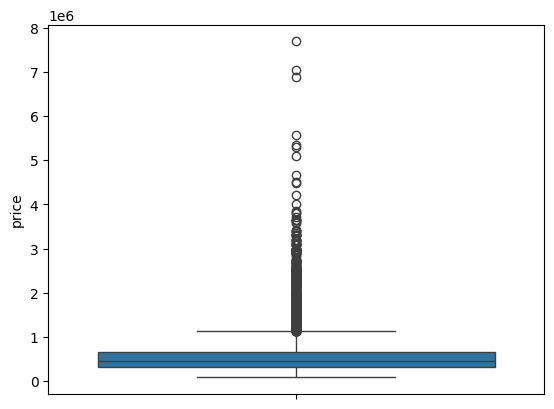

In [20]:
#PRICE
# Let's look at the price
sns.boxplot(Cleaned_Data['price']);

In [21]:
# Filtering out outliers of price in the data
clean_data = Cleaned_Data[(Cleaned_Data.price < Cleaned_Data.price.quantile(.995)) 
                        & (Cleaned_Data.price > Cleaned_Data.price.quantile(.005))]

<Axes: ylabel='bedrooms'>

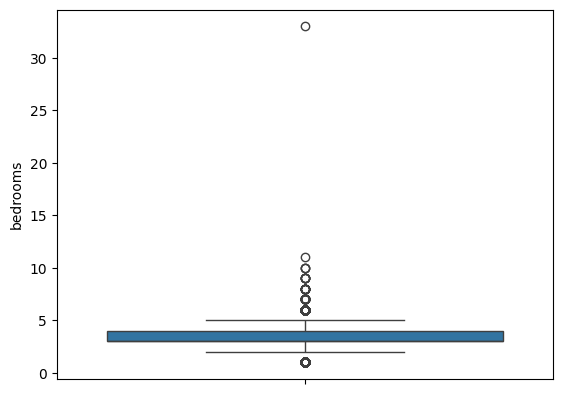

In [22]:
#BEDROOM
# Let's look at the bedrooms
sns.boxplot(Cleaned_Data['bedrooms'])

In [23]:
# the outlier in bedrooms column change to 3 bedrooms, likely due to a typographic error
Cleaned_Data.loc[(Cleaned_Data.bedrooms == 33), 'bedrooms'] = 3

**JUSTIFICATION**

Outliers can influence the parameters of statistical models, leading to biased results. Addressing outliers present in the model for the 'price' column filtering them out on the basis of the interquartile range which helps prevent the model from being overly influenced by extreme values, leading to more accurate and robust predictions.For the outlier in bedrooms column change to 3 bedrooms, likely due to a typographic error.

## 5.STATISTICAL ANALYSIS

Statistical analysis is a critical component of understanding relationships within the dataset, identifying patterns, and gaining insights. In the context of a regression modeling project for predicting property value based on home renovations, here are the key steps in statistical analysis:


 **a)Descriptive Statistics:**
   -  Understanding the basic characteristics of the dataset.
   - **Tasks:**
     -Summary statistics such as mean, median, standard deviation, and quartiles for numeric variables were computed.
     

In [24]:
Cleaned_Data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,month,age
count,2.142000e+04,21420,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,2014-10-28 05:03:51.932773120,5.407393e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,...,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,0.034547,0.385201,6.590336,43.225957
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,1.000000,-1.000000
25%,2.123537e+09,2014-07-21 00:00:00,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,4.000000,17.000000
50%,3.904921e+09,2014-10-15 00:00:00,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,...,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,0.000000,0.000000,6.000000,39.000000
75%,7.308900e+09,2015-02-13 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,...,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,0.000000,1.000000,9.000000,63.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,12.000000,115.000000
std,2.876761e+09,NaN,3.679311e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,...,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867,0.182634,0.486654,3.107924,29.387207



 **b)Correlation Analysis:**
   -  Exploring relationships between variables.
   - **Tasks:**
     - Calculate correlation coefficients (e.g., Pearson, Spearman) to assess the strength and direction of linear relationships.
     - Visualize correlations using correlation matrices .


**i)Pearson and Spearman Correlation Coefficient**

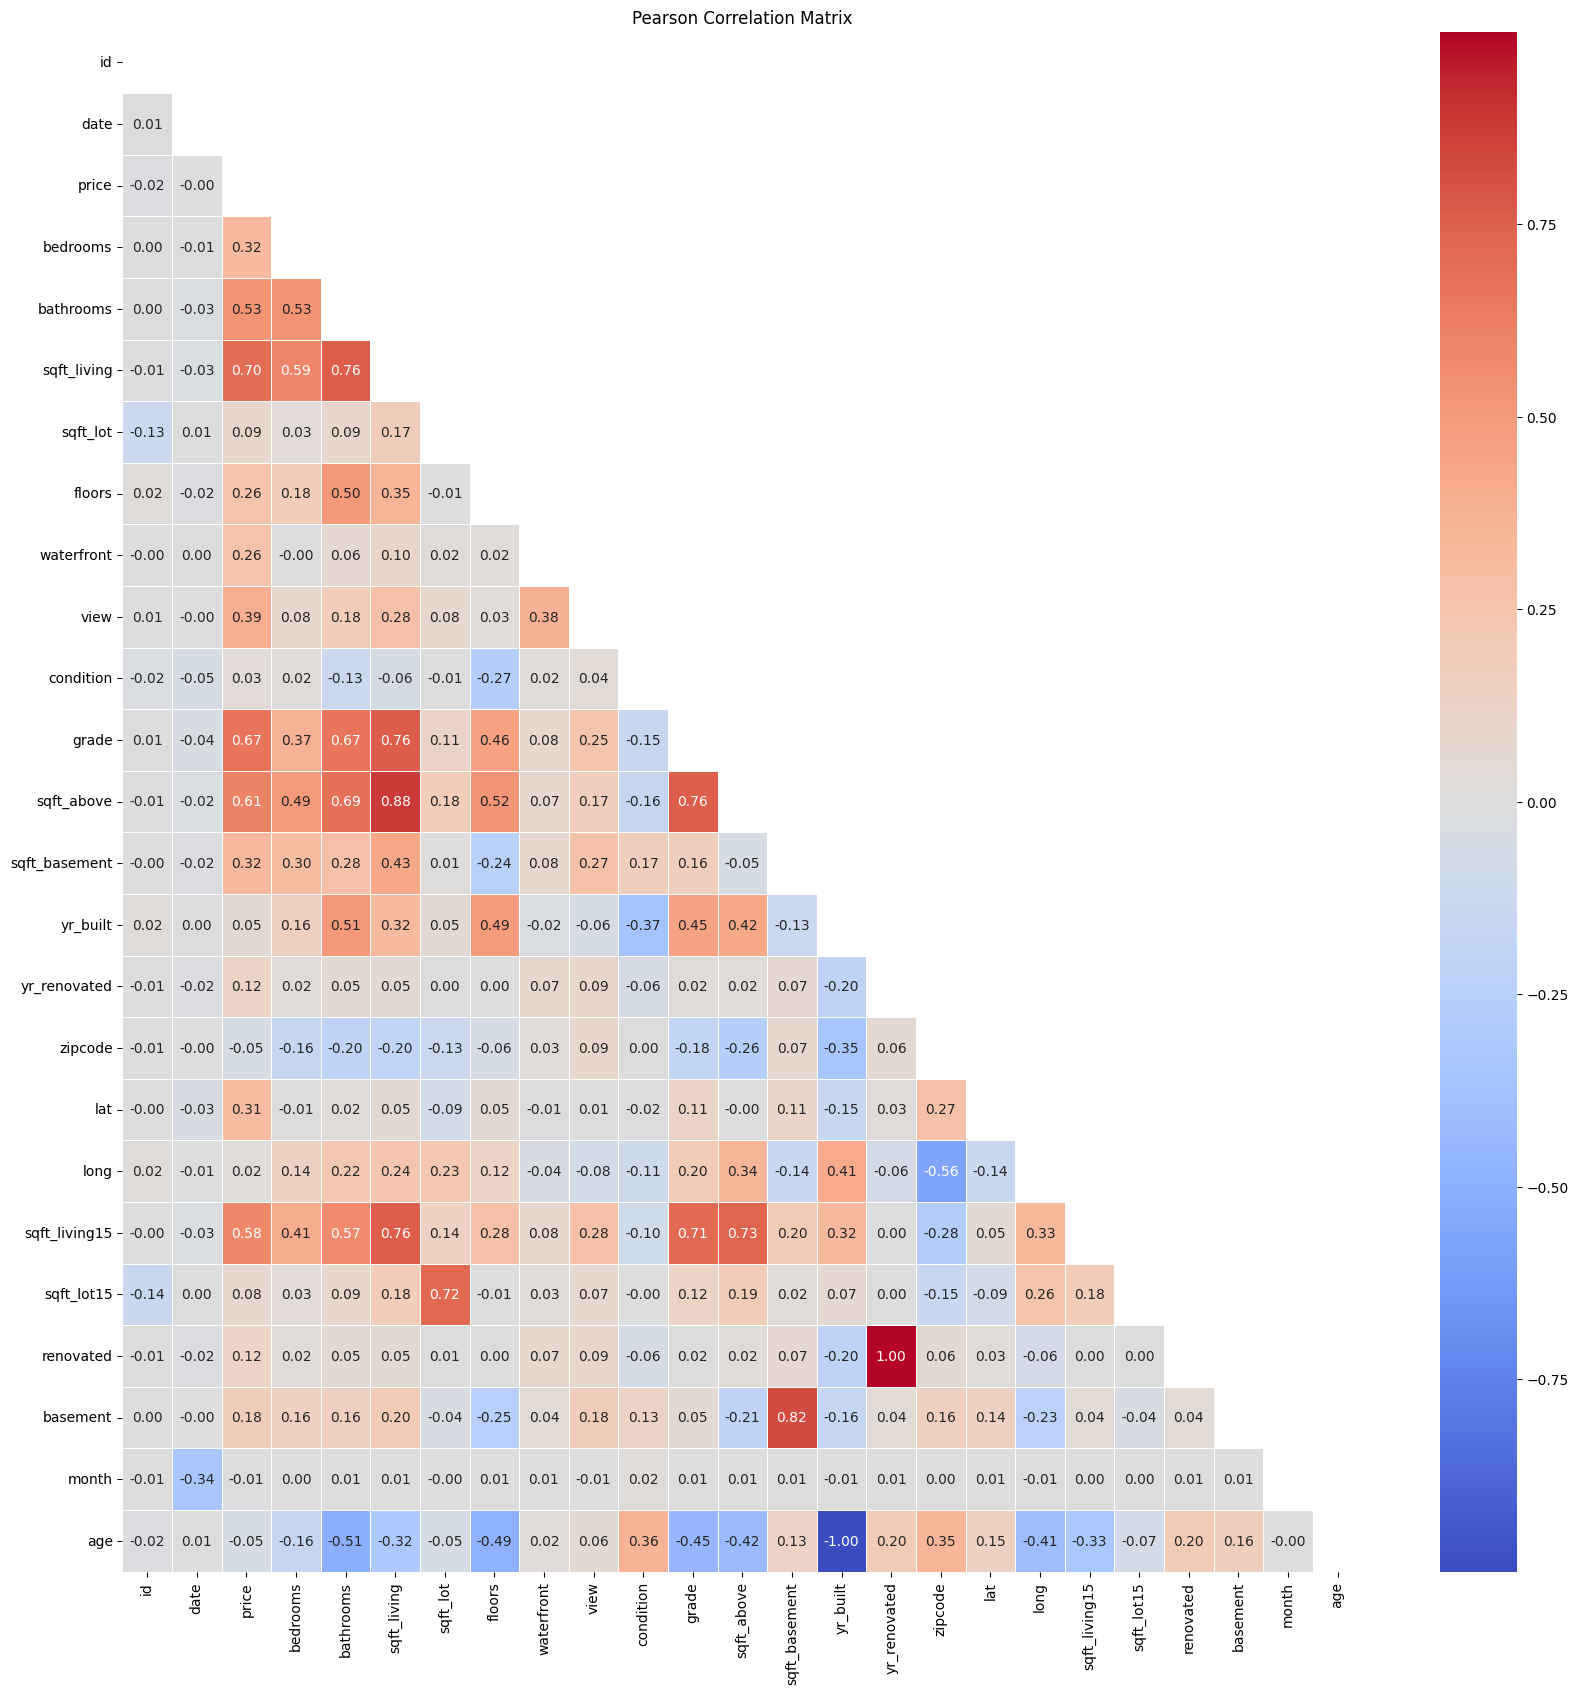

In [25]:

# Calculate the Pearson correlation matrix
pearson_corr_matrix = Cleaned_Data.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn with the mask
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)

# Add a title
plt.title('Pearson Correlation Matrix')

# Show the plot
plt.show()


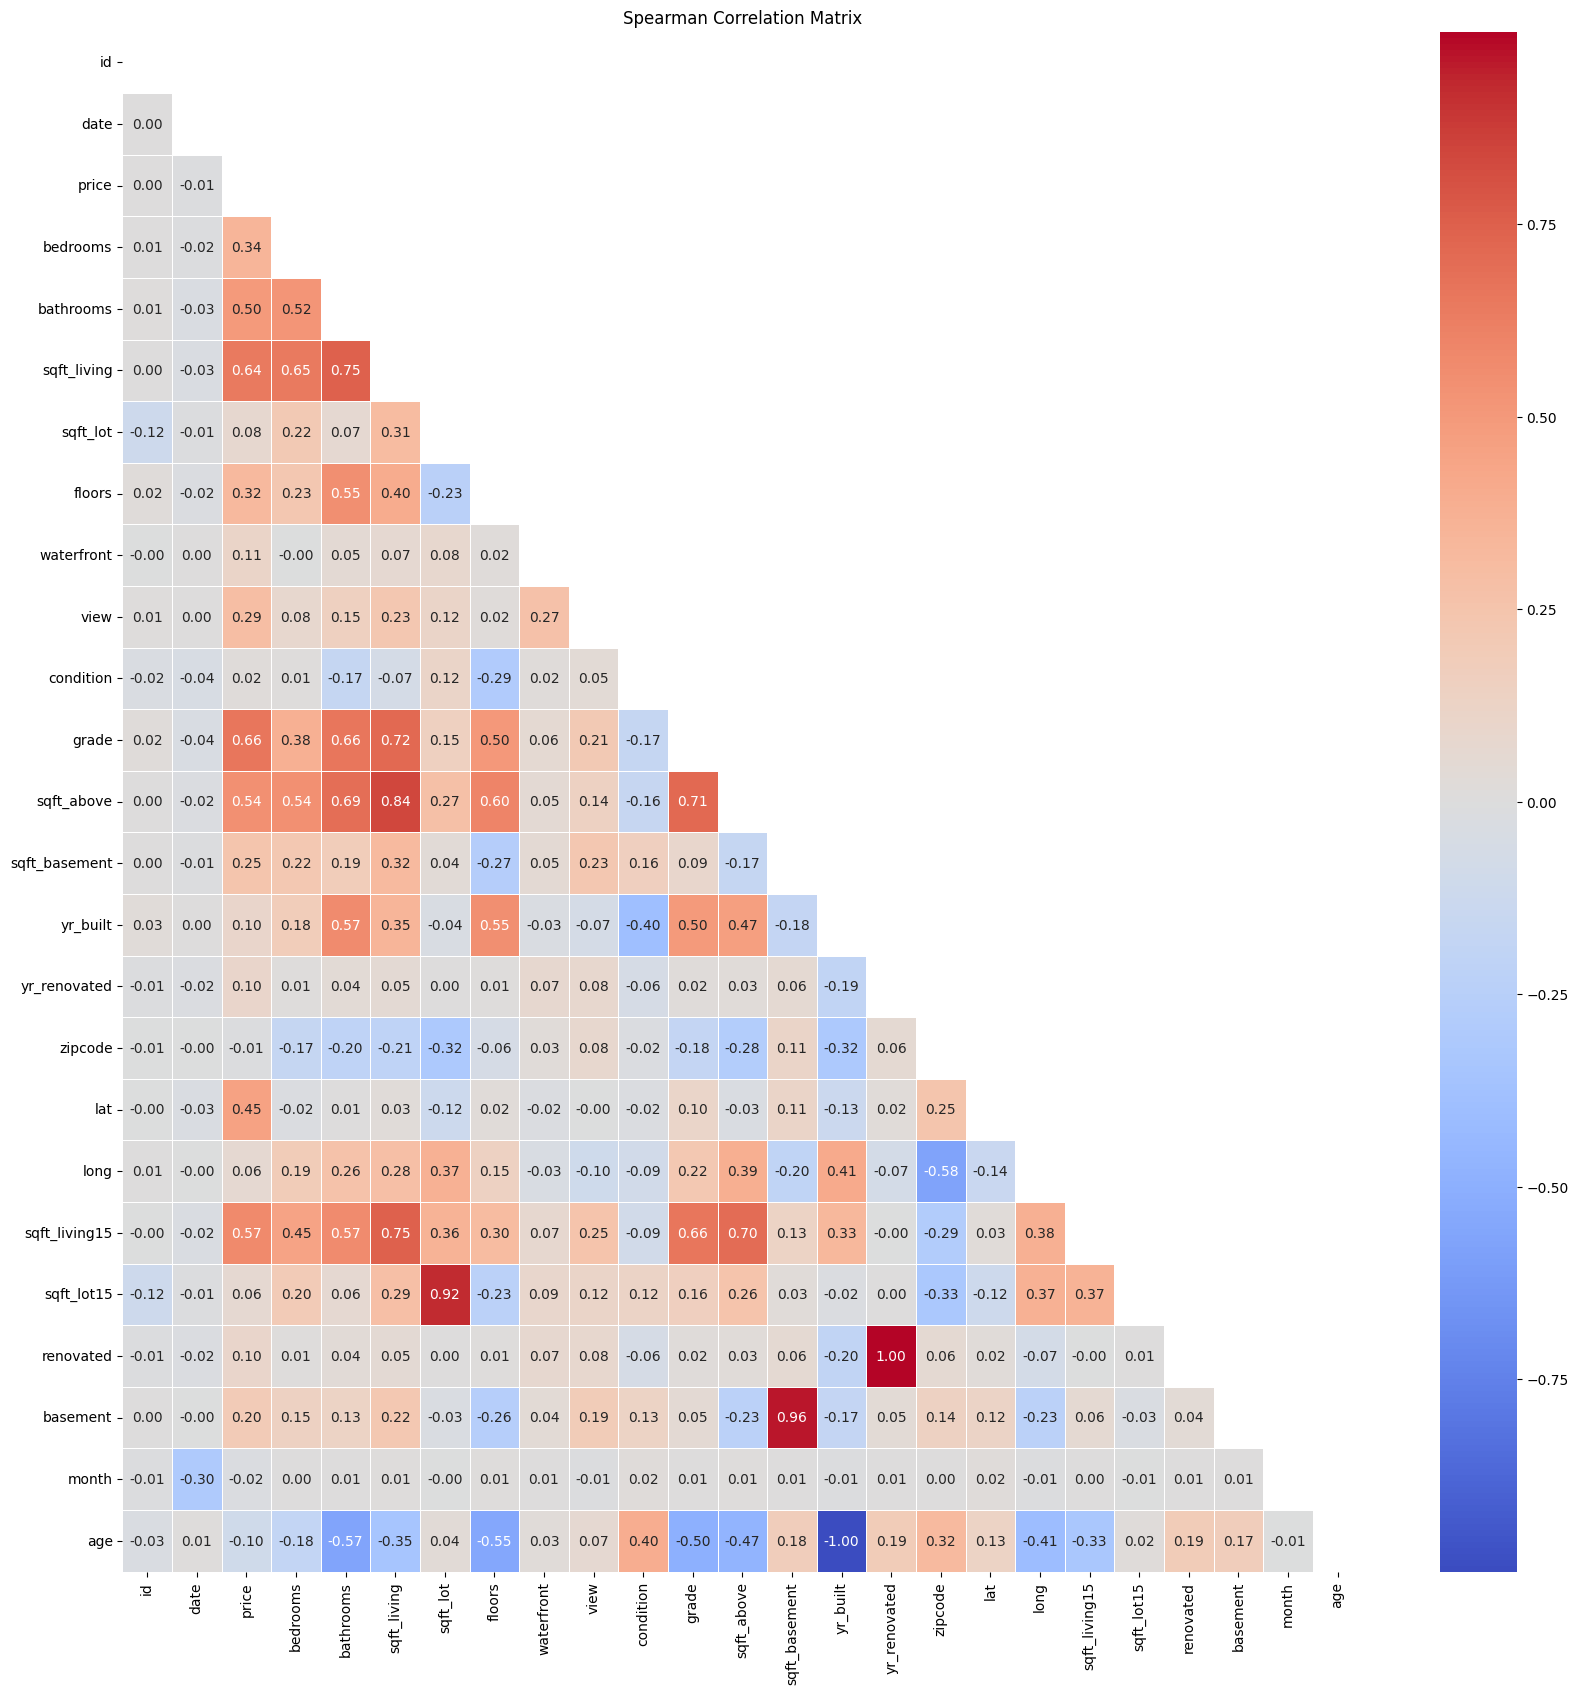

In [26]:

# Calculate the Spearman correlation matrix
spearman_corr_matrix = Cleaned_Data.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(spearman_corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn with the mask
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)

# Add a title
plt.title('Spearman Correlation Matrix')

# Show the plot
plt.show()


**FINDINGS**

The Pearson correlation matrix assesses linear relationships, while the Spearman correlation matrix assesses monotonic relationships (including both linear and non-linear monotonic relationships).

**Pearsons**

 -The Pearson correlation coefficient between 'Square Foot Living' and 'Grade' is 0.88, indicating a strong and positive linear relationship. As the size of the living area increases, the grade assigned to the property tends to increase as well.

 -The Pearson correlation coefficient between 'Year Built' and 'Age' is -1.00, indicating a perfect negative linear relationship. This means that as the year a property was built increases, its age decreases in a perfect linear fashion.
 
-The Pearson correlation coefficient between 'Renovated' and the number of 'Floors' is 0.00, suggesting no significant linear relationship between the renovation status and the number of floors. The correlation is close to zero, indicating that the presence or absence of renovation does not show a clear linear trend with the number of floors.
  
**Spearmans**

 -The Spearman correlation coefficient between 'Sqft Above' and 'Sqft Living' is 0.84, indicating a strong and positive monotonic relationship. This suggests that as the square footage above ground increases, the overall square footage of the living space tends to increase in a consistently positive manner.

 -The Spearman correlation coefficient between 'Bathrooms' and 'Age' is -0.57, revealing a moderate negative monotonic relationship. This implies that, on average, properties with a higher number of bathrooms tend to be relatively younger in age.
 
 -The Spearman correlation coefficient between 'Month' and 'Zipcode' is 0.00, indicating no significant monotonic relationship between the month of sale and the property's zipcode. The correlation is close to zero, suggesting that the month of sale and the zipcode do not exhibit a clear monotonic trend.




**ii)Correlation matrix**

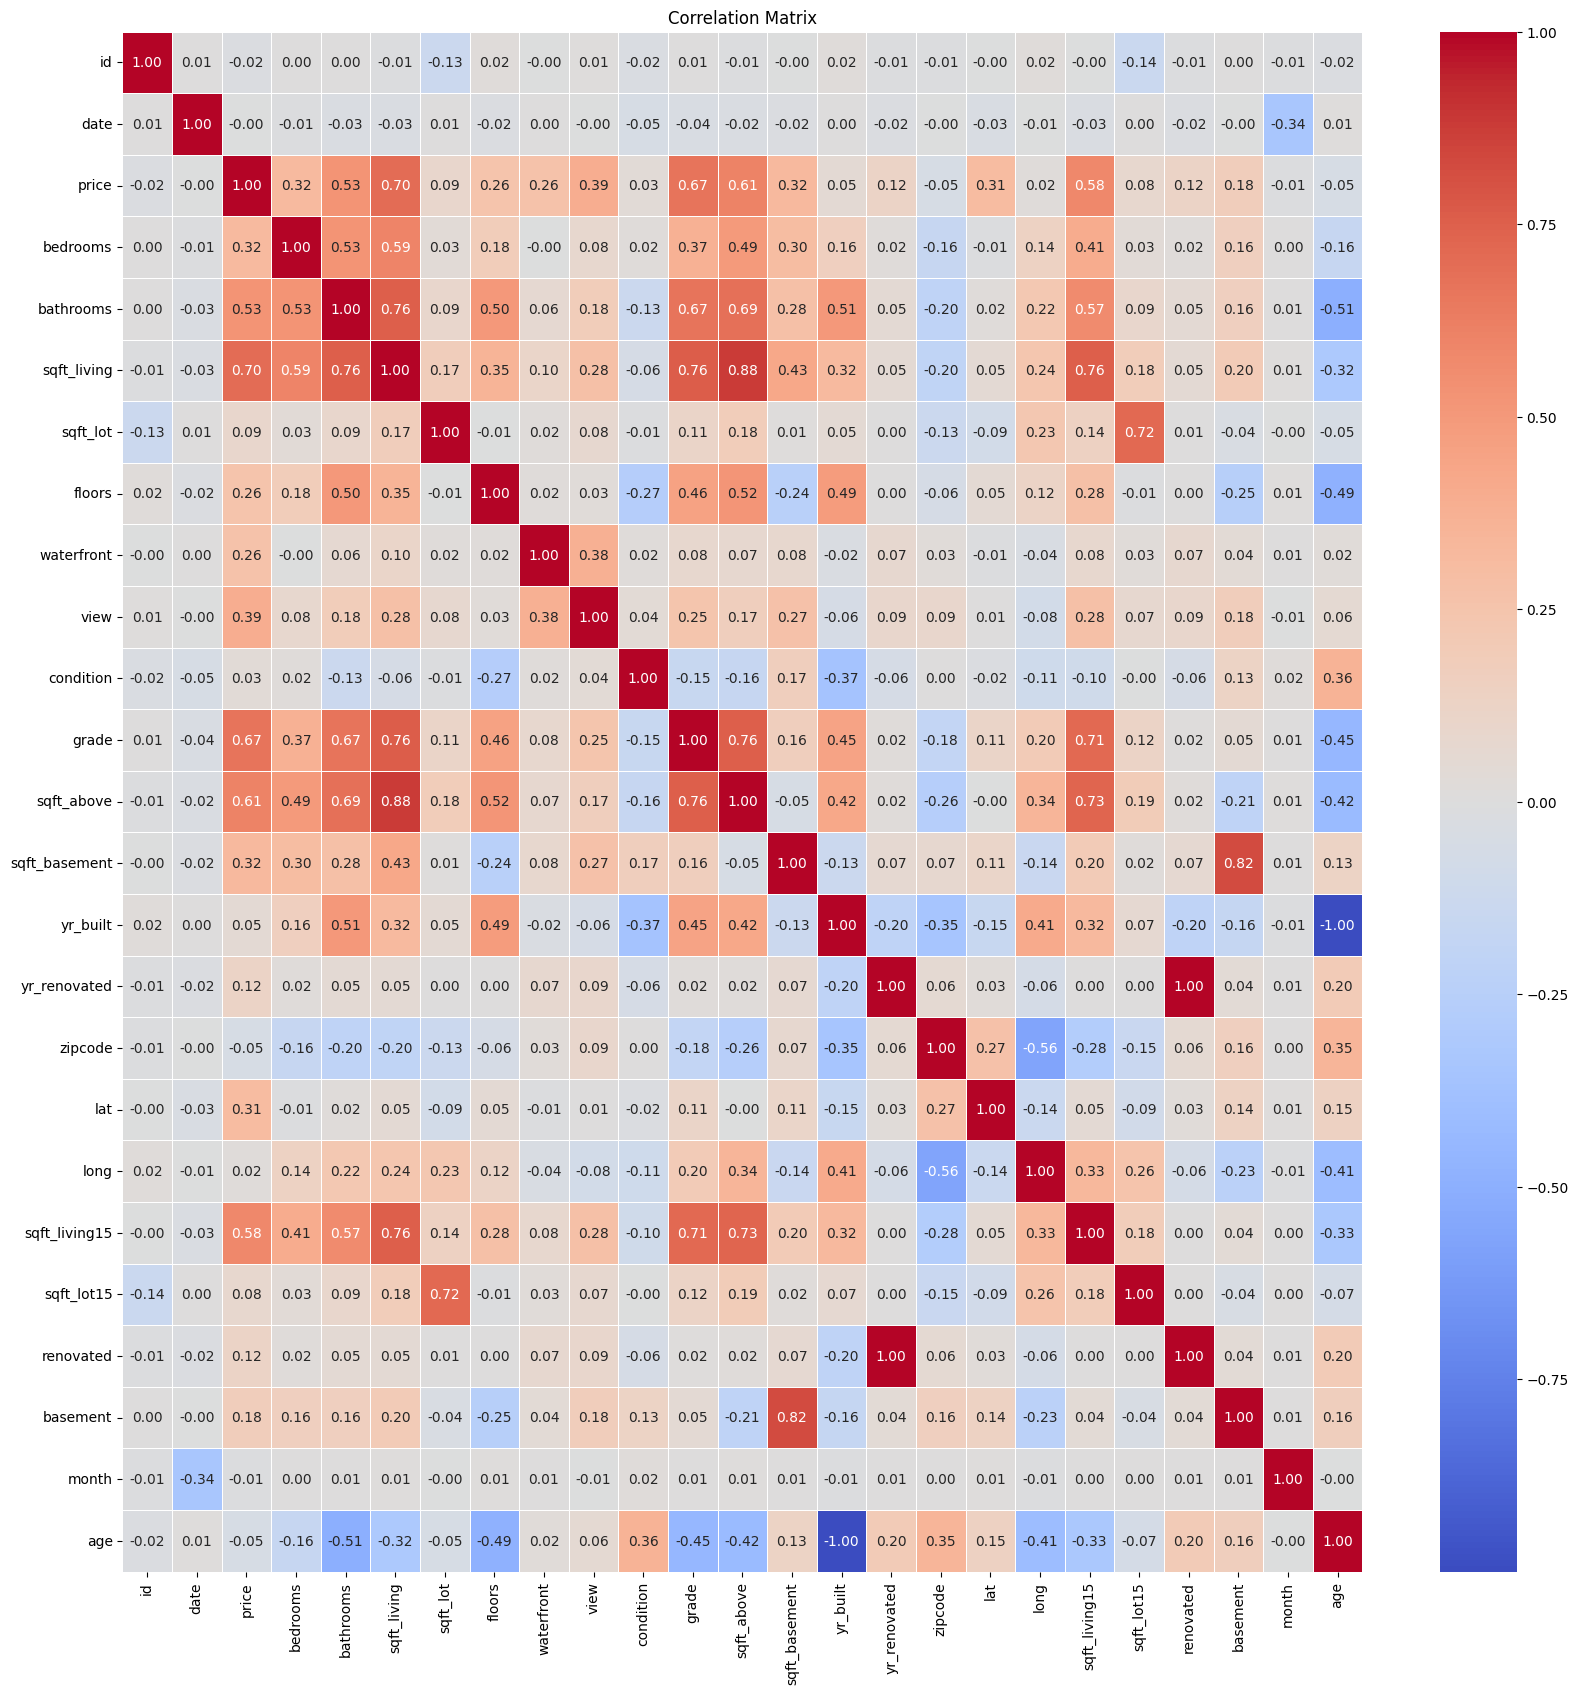

In [27]:

correlation_matrix = Cleaned_Data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20,20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


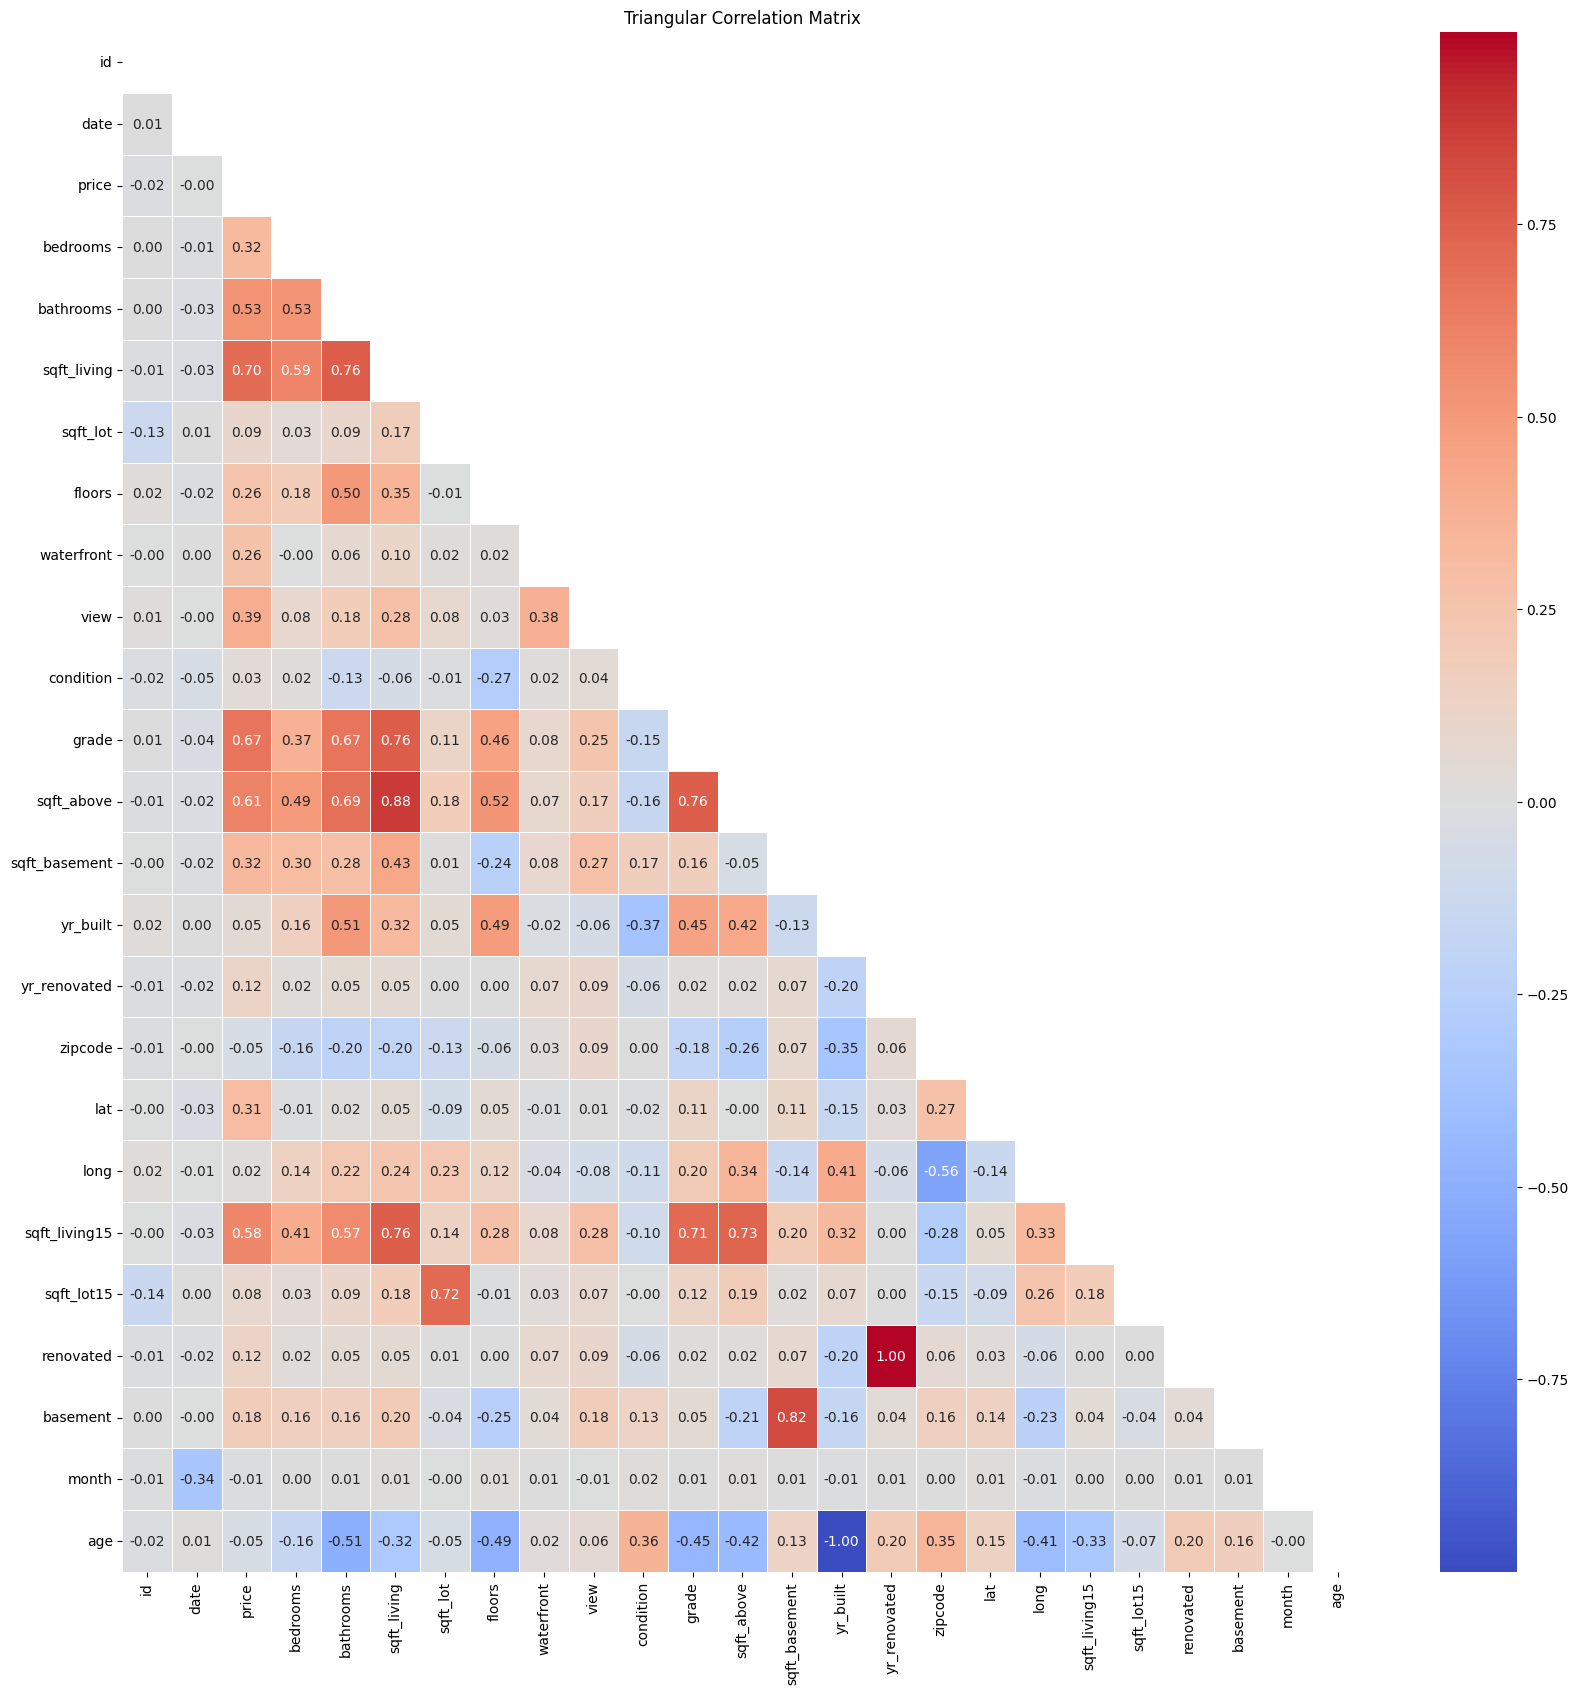

In [28]:

# Calculate the correlation matrix
correlation_matrix = Cleaned_Data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)

# Add a title
plt.title('Triangular Correlation Matrix')

# Show the plot
plt.show()


**FINDINGS**

-The correlation coefficient between 'Renovated' and 'Year Renovated' is 1.00, indicating a perfect positive correlation. This means that the two variables move in perfect sync — as the 'Renovated' status changes, the year of renovation also changes in a strong positive linear manner.

-The correlation coefficient between 'Age' and 'Year Built' is -1.00, revealing a perfect negative correlation. This implies that as the 'Year Built' increases, indicating newer properties, the 'Age' of the property decreases in a perfect negative linear manner.

-The Pearson correlation coefficient between 'Zipcode' and 'Condition' is 0.00, indicating no significant linear correlation between these two variables. The correlation is close to zero, suggesting that variations in 'Zipcode' are not systematically related to variations in 'Condition.

 **c)Distribution Analysis:**
   -  Examining the distributions of key variables.
   - **Tasks:**
     - Check the distribution of the target variable ('price') and predictor variables.
     - Identify and address skewed distributions if needed.


**i)Target Variable-Price**

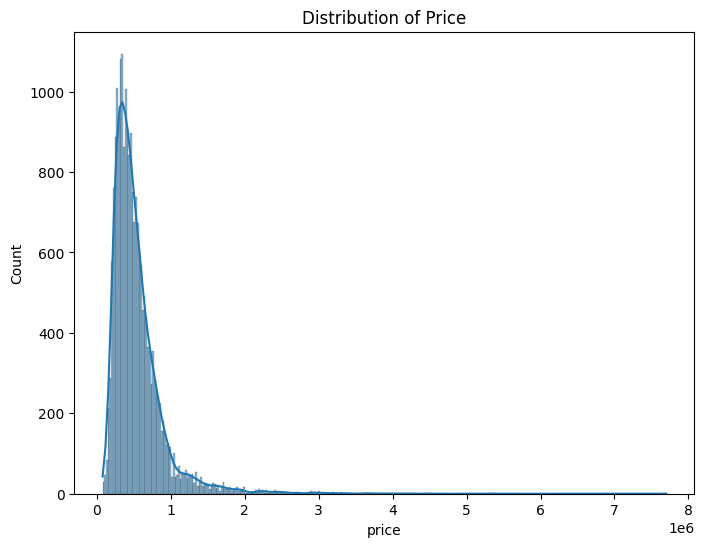

In [29]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=kc_house_data, x='price', kde=True)
plt.title("Distribution of Price")
plt.show()

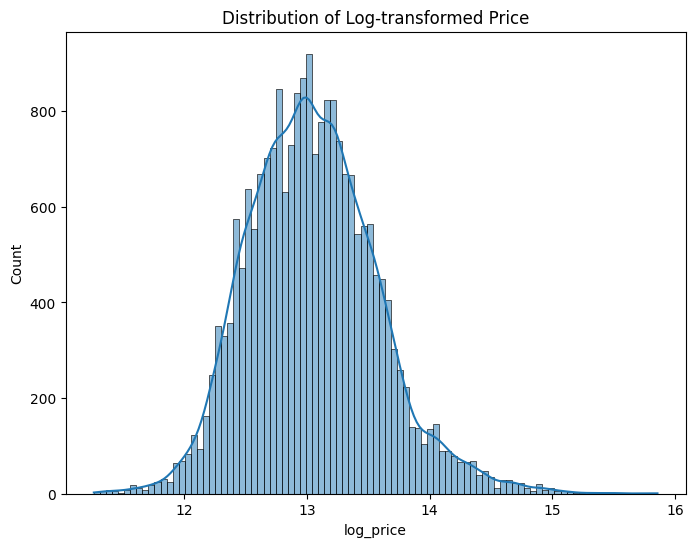

In [30]:

# Apply log transformation to the 'price' column
kc_house_data['log_price'] = np.log1p(kc_house_data['price'])

# Plot the distribution of the log-transformed price
plt.figure(figsize=(8, 6))
sns.histplot(data=kc_house_data, x='log_price', kde=True)
plt.title("Distribution of Log-transformed Price")
plt.show()


**JUSTIFICATION**

-The price column is positively skewed .Log transformation was applied to normalise the price column bring extreme values closer to the center, allowing for a more normalized distribution.

**ii)Checking the distribution of other variables**

### a) Relationship between Predictor Variables

In [31]:


variables = ['price' ,'bedrooms' ,'bathrooms','sqft_living','floors','condition','grade','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','renovated',
'basement','age']

for variable in variables:
    data = Cleaned_Data[variable]  
    
    statistic, p_value = kstest(data, 'norm')
    
    alpha = 0.05  # significance level
    
    if p_value > alpha:
        print(f"The distribution of '{variable}' appears to be normally distributed (fail to reject H0)")
    else:
        print(f"The distribution of '{variable}' does not appear to be normally distributed (reject H0)")

The distribution of 'price' does not appear to be normally distributed (reject H0)
The distribution of 'bedrooms' does not appear to be normally distributed (reject H0)
The distribution of 'bathrooms' does not appear to be normally distributed (reject H0)
The distribution of 'sqft_living' does not appear to be normally distributed (reject H0)
The distribution of 'floors' does not appear to be normally distributed (reject H0)
The distribution of 'condition' does not appear to be normally distributed (reject H0)
The distribution of 'grade' does not appear to be normally distributed (reject H0)
The distribution of 'sqft_above' does not appear to be normally distributed (reject H0)
The distribution of 'sqft_basement' does not appear to be normally distributed (reject H0)
The distribution of 'yr_built' does not appear to be normally distributed (reject H0)
The distribution of 'lat' does not appear to be normally distributed (reject H0)
The distribution of 'long' does not appear to be normal

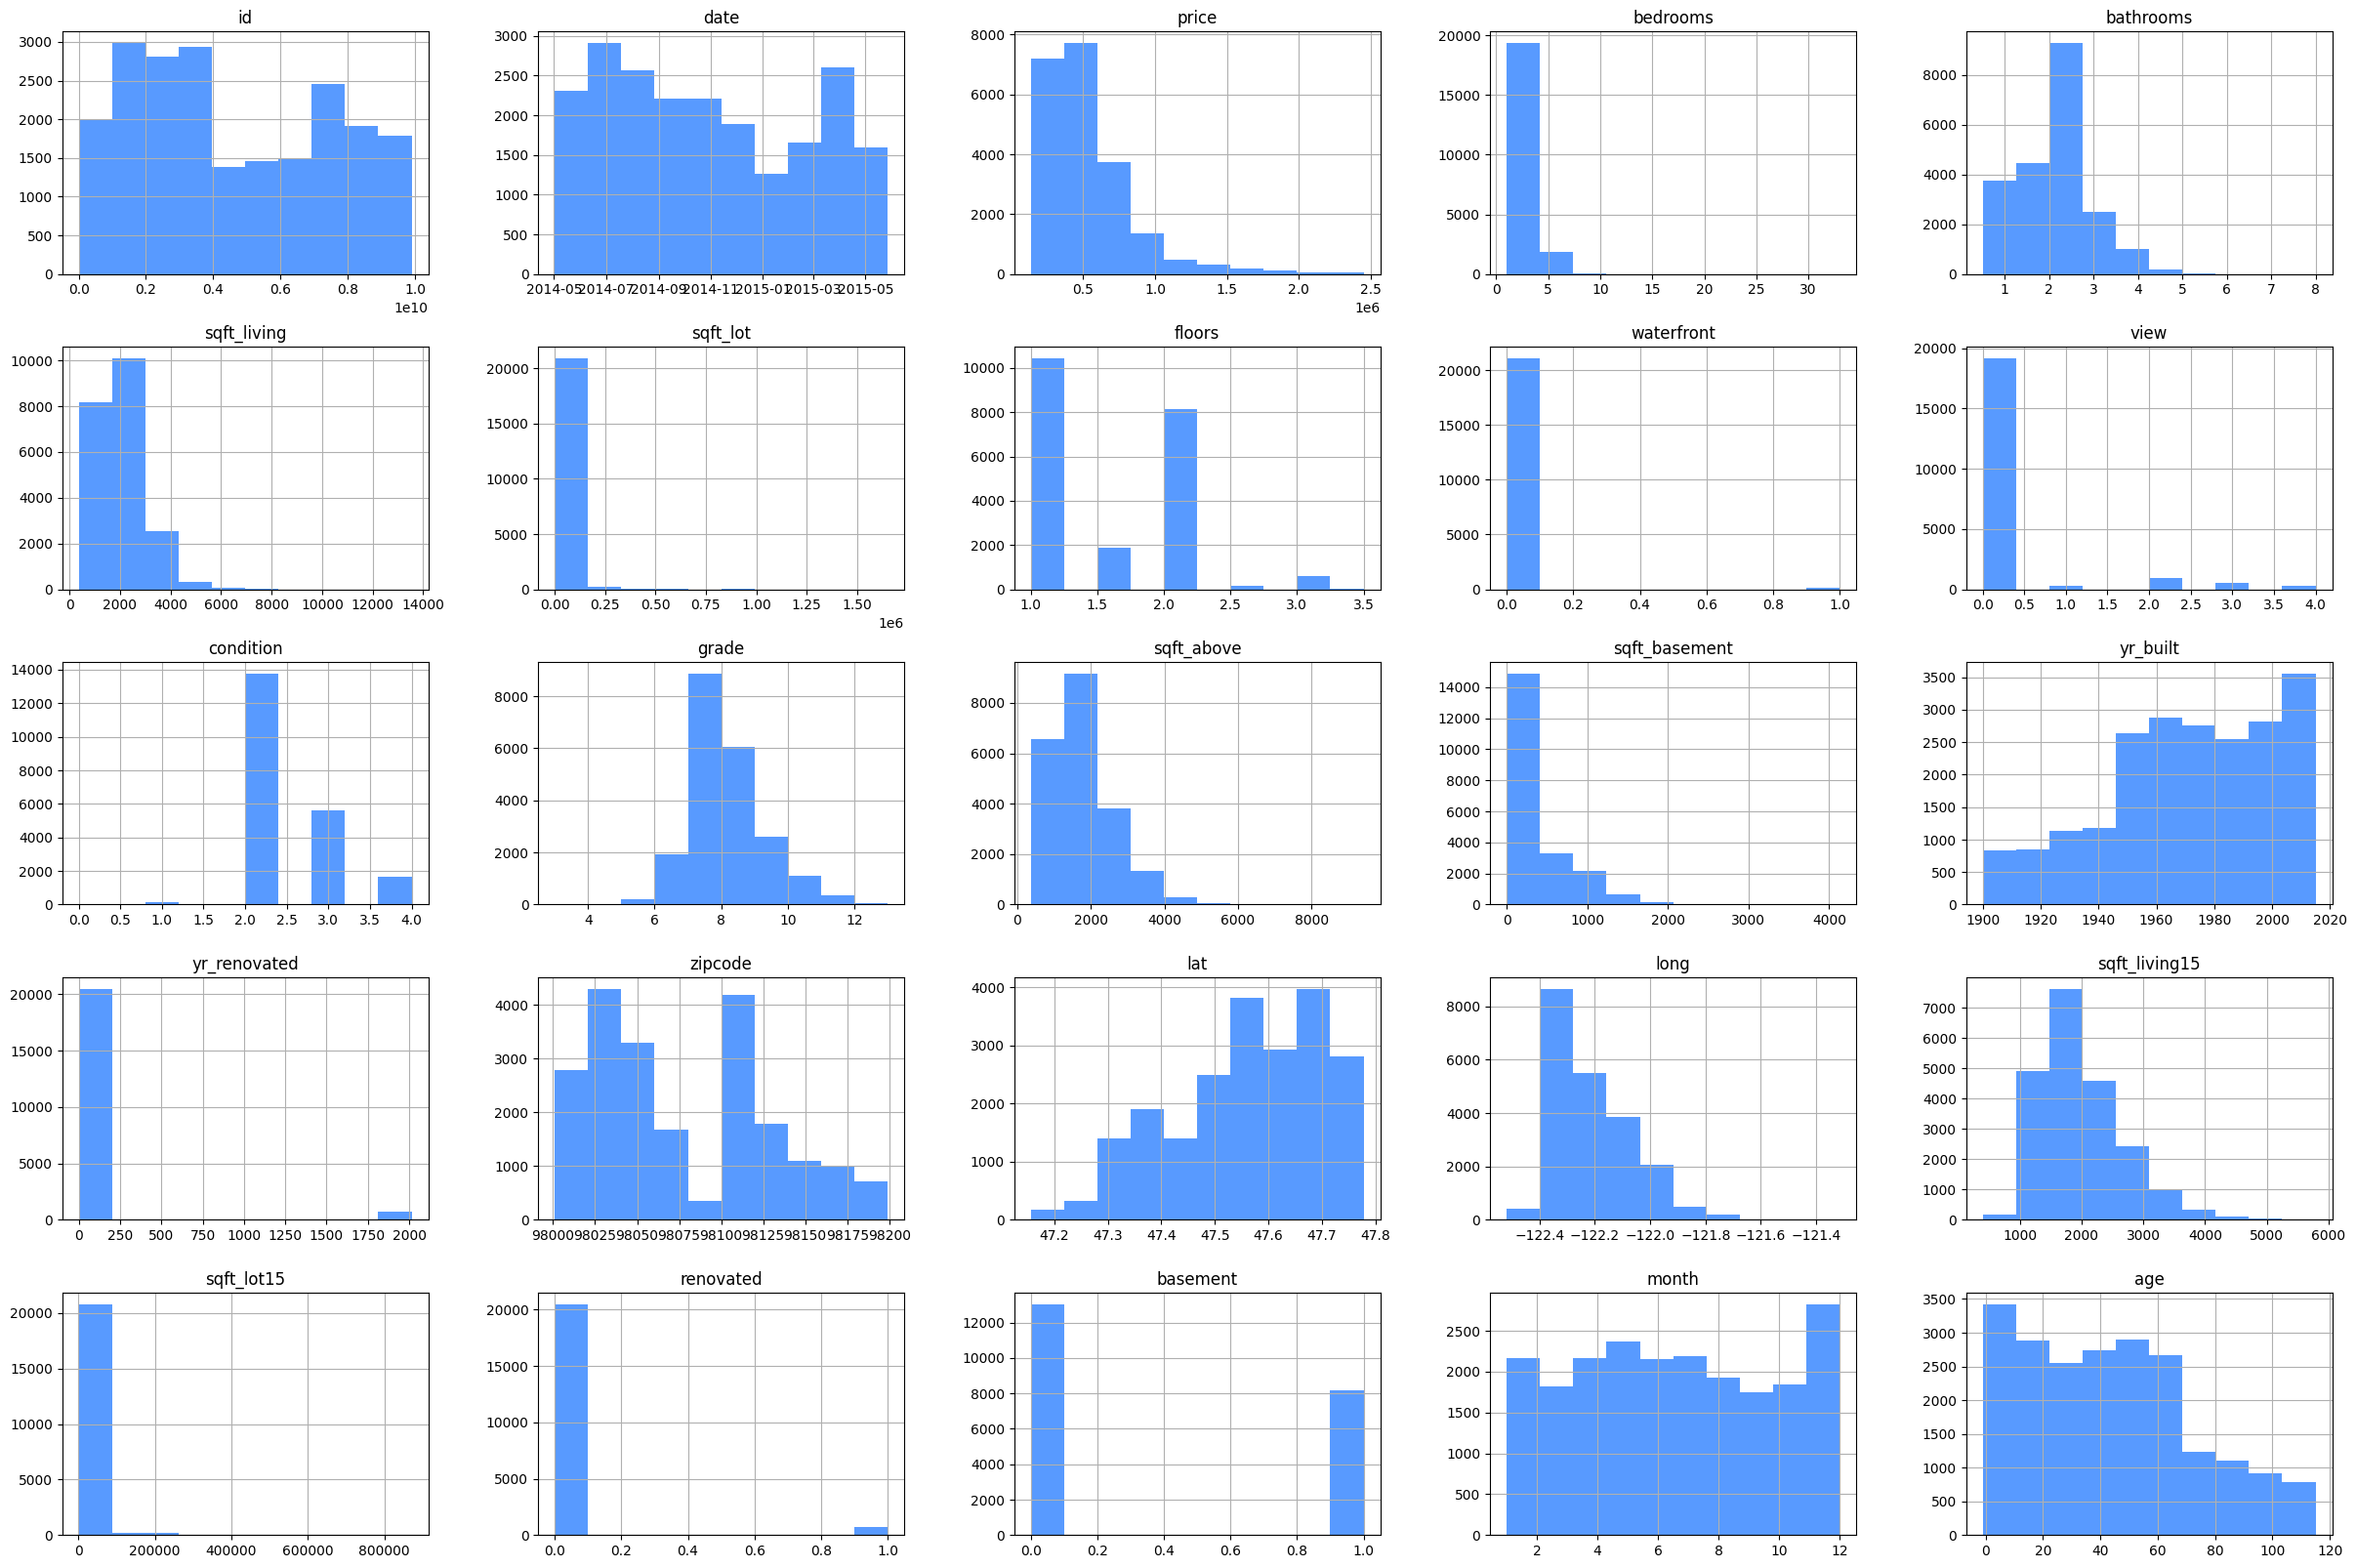

In [32]:
# plot the frequency for the data columns
clean_data.hist(figsize=(30, 20), color='#589aff')
plt.show()

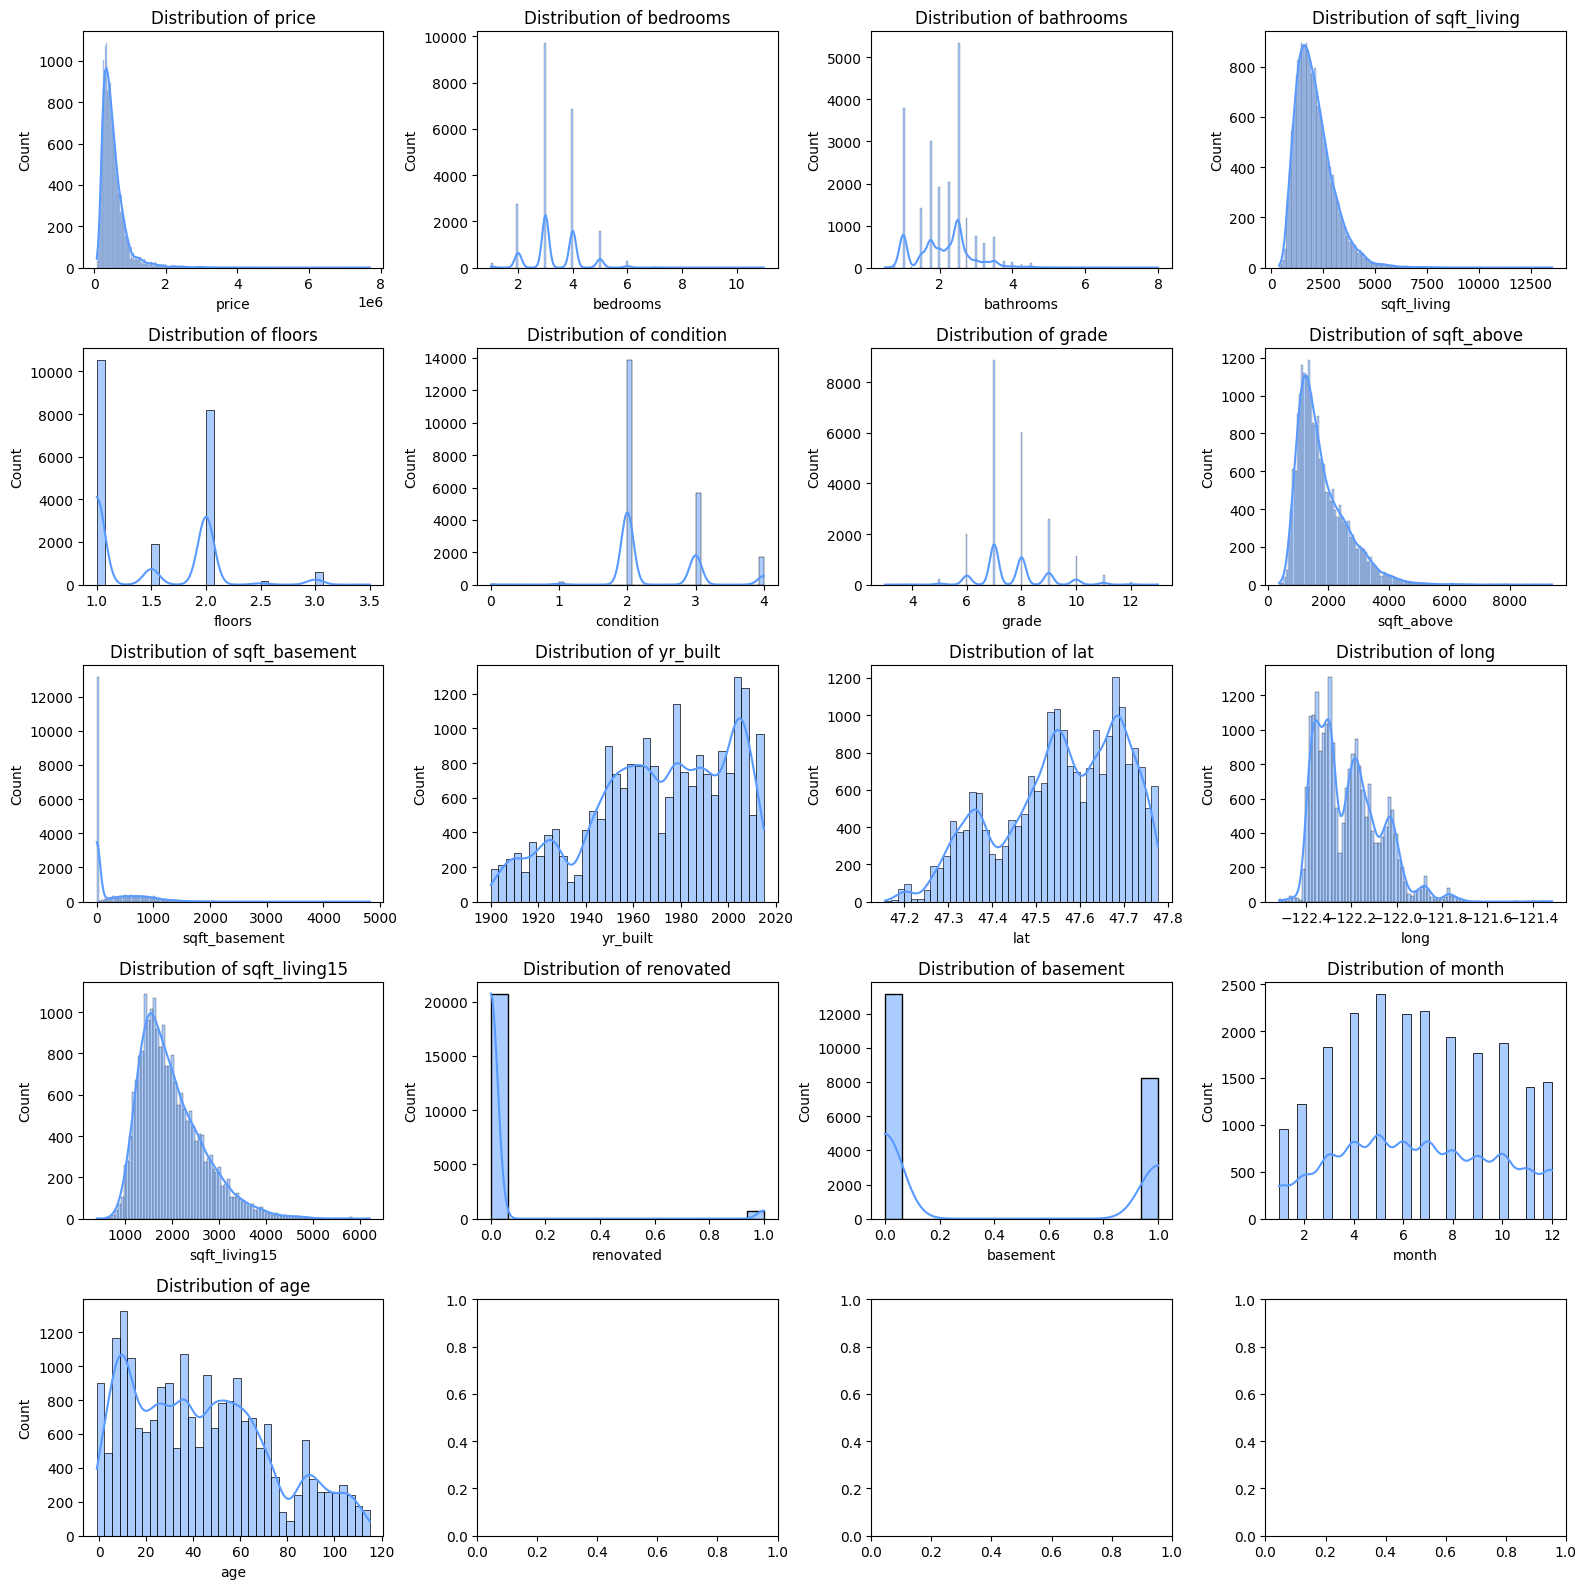

In [33]:

# features_of_interest list based on the DataFrame
features_of_interest = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
                         'condition', 'grade', 'sqft_above', 'sqft_basement',
                         'yr_built', 'lat', 'long', 'sqft_living15', 'renovated', 'basement',
                         'month', 'age']

# Extract relevant columns from the DataFrame
selected_data = Cleaned_Data[features_of_interest]

# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 16))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot the distributions of each variable with the specified color
for i, column in enumerate(features_of_interest):
    sns.histplot(selected_data[column], kde=True, ax=axes[i], color='#589aff')
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


 **d)Hypothesis Testing:**
   - Formulating and test hypotheses related to the data.
   
 Null Hypothesis (H0): There is no statistically significant relationship between the selected features and housing prices. 
 
Alternative Hypothesis (Ha): The selected features have a statistically significant relationship with housing prices.
   - **Tasks:**
     - Formulate null and alternative hypotheses based on project objectives.
     - Conduct hypothesis tests (e.g., t-tests, ANOVA) to assess the significance of relationships.

In [34]:
# features_of_interest list based on the DataFrame
features_of_interest = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                         'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                         'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
                         'sqft_living15', 'sqft_lot15']

# Extract relevant columns from the DataFrame
selected_data = Cleaned_Data[features_of_interest]

# Create an empty DataFrame to store ANOVA results
anova_results = pd.DataFrame(index=['F-statistic', 'P-value'])

# Perform ANOVA for each feature
significant_features = []

for column in features_of_interest:
    groups = [Cleaned_Data[column][Cleaned_Data[column].notnull() & (Cleaned_Data['price'] == category)] 
              for category in Cleaned_Data['price'].unique()]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Store results in the DataFrame
    anova_results[column] = [f_statistic, p_value]
    
    # Print interpretation
    if p_value < 0.05:  
        significant_features.append(column)
        print(f"{column}: Reject the null hypothesis. There is a statistically significant relationship.")
    else:
        print(f"{column}: Fail to reject the null hypothesis. There is no statistically significant relationship.")

# Display ANOVA results
print("\nANOVA Results:")
print(anova_results)


bedrooms: Reject the null hypothesis. There is a statistically significant relationship.
bathrooms: Reject the null hypothesis. There is a statistically significant relationship.
sqft_living: Reject the null hypothesis. There is a statistically significant relationship.
sqft_lot: Fail to reject the null hypothesis. There is no statistically significant relationship.
floors: Reject the null hypothesis. There is a statistically significant relationship.
waterfront: Reject the null hypothesis. There is a statistically significant relationship.
view: Reject the null hypothesis. There is a statistically significant relationship.
condition: Reject the null hypothesis. There is a statistically significant relationship.
grade: Reject the null hypothesis. There is a statistically significant relationship.
sqft_above: Reject the null hypothesis. There is a statistically significant relationship.
sqft_basement: Reject the null hypothesis. There is a statistically significant relationship.
yr_buil

**FINDINGS**

-The features listed under "Reject the Null Hypothesis" have a statistically significant relationship with housing prices. These features are important predictors of housing prices in the given dataset. On the other hand, features listed under "Fail to Reject the Null Hypothesis" do not show a statistically significant relationship with housing prices based on the ANOVA test. 

 **e)Multicollinearity Assessment:**
   - Checking for multicollinearity among predictor variables.
   - **Tasks:**
     - Calculate variance inflation factors (VIF) to identify high multicollinearity.
     - Address multicollinearity by removing or combining correlated variables.


In [37]:

X = Cleaned_Data[features_of_interest].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF results
print("VIF Results:")
print(vif_data)


VIF Results:
          Feature            VIF
0        bedrooms      25.495189
1       bathrooms      28.860034
2     sqft_living     895.654888
3        sqft_lot       2.359333
4          floors      16.742951
5      waterfront       1.186733
6            view       1.518831
7       condition      17.962156
8           grade     143.184319
9      sqft_above     670.785304
10  sqft_basement      46.689472
11       yr_built    8371.874192
12   yr_renovated       1.151077
13            lat  119806.117276
14           long  132820.153914
15  sqft_living15      26.794623
16     sqft_lot15       2.576818


**VIF(Variance Inflation Factor) RESULTS**

High Multicollinearity (VIF > 10):
sqft_living has a VIF of 897.14.
grade has a VIF of 160.00.
sqft_above has a VIF of 671.11.
yr_built has a VIF of 9335.60.
lat has a VIF of 132369.36.
long has a VIF of 139978.97.
sqft_living15 has a VIF of 26.81.

Moderate Multicollinearity (VIF between 5 and 10):
bedrooms has a VIF of 25.95.
bathrooms has a VIF of 29.14.
floors has a VIF of 16.76.
yr_basement has a VIF of 46.71.
bedrooms has a VIF of 25.95.

Low Multicollinearity (VIF <= 5):

sqft_lot has a VIF of 2.36.
waterfront has a VIF of 1.25.
view has a VIF of 1.56.
condition has a VIF of 18.06.
yr_renovated has a VIF of 1.15.
sqft_lot15 has a VIF of 2.58. 

**CONCLUSION**

-Features with VIF values well above 10 (e.g., sqft_living, grade, sqft_above, yr_built, lat, long) indicate a high level of multicollinearity.

-Features with moderate VIF values (between 5 and 10) 

-Features with low VIF values (below 5) are considered to have acceptable levels of multicollinearity.

In [38]:
# creating a function that takes in a dataframe and threshold and returns top correlations
def corr_check(Cleaned_Data, threshold):
    '''
    Enter dataframe and threshold for correlation
    Returns table of the highly correlated pairs
    '''
    corr_df = Cleaned_Data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
    corr_df.set_index(['pairs'], inplace = True)
    corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
    corr_df.columns = ['cc']
    corr_df = corr_df.drop_duplicates()
    corr_df = corr_df[(corr_df['cc'] > threshold) & (corr_df['cc'] < 1)]
    return corr_df

result = corr_check(Cleaned_Data, 0.7)
print(result)

                                    cc
pairs                                 
(yr_renovated, renovated)     0.999968
(age, yr_built)               0.999874
(sqft_living, sqft_above)     0.876533
(basement, sqft_basement)     0.820906
(sqft_living, grade)          0.762477
(sqft_above, grade)           0.756221
(sqft_living, sqft_living15)  0.756186
(bathrooms, sqft_living)      0.755522
(sqft_living15, sqft_above)   0.731887
(sqft_lot, sqft_lot15)        0.717743
(grade, sqft_living15)        0.713178
(sqft_living, price)          0.701875


**CORRELATION CHECK RESULTS**

Highly Positive Correlations:

yr_renovated and renovated have a very high positive correlation of approximately 1. This suggests that the two variables are almost perfectly correlated, and including both in a model may lead to multicollinearity issues.

age and yr_built also have a very high positive correlation of approximately 1. This is expected, as age is derived from yr_built. Including both in a model may lead to redundancy.

High Positive Correlations:

sqft_living and sqft_above have a high positive correlation of 0.8765. This indicates a strong positive linear relationship between the total living area (sqft_living) and the area above ground (sqft_above).

basement and sqft_basement have a high positive correlation of 0.8209. This suggests a strong positive linear relationship between the total basement area (sqft_basement) and the binary indicator of having a basement (basement).

sqft_living and grade have a high positive correlation of 0.7625. This indicates a strong positive linear relationship between the total living area (sqft_living) and the grade of the house.

-Some columns will have to be dropped including Year renovated,sqft living 15 and sqft lot which have high multicollinearity.

In [39]:
# Drop columns that have strong multicollinearity
clean_data = Cleaned_Data.drop(columns=['view', 'sqft_lot', 'waterfront', 'sqft_lot15', 'yr_renovated'])

In [40]:
clean_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,renovated,basement,month,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,1.0,2,7,1180,0.0,1955,98178,47.5112,-122.257,1340,0,0,10,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,2.0,2,7,2170,400.0,1951,98125,47.7210,-122.319,1690,1,1,12,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,1.0,2,6,770,0.0,1933,98028,47.7379,-122.233,2720,0,0,2,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,1.0,4,7,1050,910.0,1965,98136,47.5208,-122.393,1360,0,1,12,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,1.0,2,8,1680,0.0,1987,98074,47.6168,-122.045,1800,0,0,2,28


In [41]:
clean_data.shape

(21420, 20)

## 6.DATA MODELING

In [42]:
# Use linear regression
lr = LinearRegression()

In [43]:
# Our model needs to have only numeric variables. 
def only_numeric(data):
    '''returns a dataframe with only numeric values'''
    for column in clean_data.columns:
        if is_numeric_dtype(data[column]) == False:
            data = data.drop(column, axis=1)
        else:
            continue
    return data

In [44]:
# Splits a dataframe into X and Y dataframes given a target column.
def get_y_X(data, target):
    '''Returns a series of target (y) value and a dataframe of predictors (X)'''
    y = data[target] 
    X = data.drop(target, axis=1)
    return y, X

In [45]:
# Returns training and test R2 & RMSE metrics
def get_metrics(X_tr, X_te, y_tr, y_te):
    ''' Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and returns metrics'''
    lr.fit(X_tr, y_tr)
    
    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)
    
    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)
    
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))
    
    return train_score, test_score, train_rmse, test_rmse

In [46]:
# Prints the metrics of a multiple regression train and test, with option of OLS summary on train data.
def train_test_compare(X_tr, X_te, y_tr, y_te):
    '''Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and prints metrics'''
    lr.fit(X_tr, y_tr)
    
    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)
    
    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)
    
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))
    
    print(f' training data R2: {train_score}\n testing data R2: {test_score} \
                    \n training data rmse: {train_rmse}\n testing data rmse: {test_rmse}')
    
    stats_summ = input('Do you want a statsmodel summary of the train data? (y/n)')
    if stats_summ == 'y':
        inter = lr.intercept_
        stats = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
        summary = stats.summary()
        print(summary)
    
    return

# MODEL 1 : BASELINE MODEL

**a)Train test split**

Train Test Split
The raw data was split to a train and test set for a baseline model. The clean data was also split to a train and test set for a fully optimized model.

In [47]:

# Defining function that splits data into training and testing data.
def train_test(data, size=.25):
    '''Takes in dataframe, and size of test for the split
        Returns the train_set and test_set'''
    train_set, test_set = train_test_split(data, test_size=size, random_state=42)
    return train_set, test_set

In [48]:

# Define the function to filter only numeric columns
def only_numeric(data):
    '''returns a DataFrame with only numeric values'''
    for column in data.columns:
        if not is_numeric_dtype(data[column]):
            data = data.drop(column, axis=1)
    return data

# Create the dataframe for the baseline model and drop missing values
baseline = only_numeric(kc_house_data)
baseline = baseline.dropna()

# Assuming train_test is a function that splits the data into train and test sets
baseline_train_set, baseline_test_set = train_test(baseline, 0.25)

# Assuming train_test is a function that splits the data into train and test sets for the clean_data
train_set, test_set = train_test(clean_data, 0.25)


In [49]:

# Select relevant features
features = [ 'bedrooms', 'bathrooms' , 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age',
'sqft_living', 'condition' ]

# Create a design matrix X and target variable y
X = sm.add_constant(Cleaned_Data[features])
y = clean_data['price']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary
summary = model.summary()

# Print the summary
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2494.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:06:05   Log-Likelihood:            -2.9321e+05
No. Observations:               21420   AIC:                         5.865e+05
Df Residuals:                   21402   BIC:                         5.866e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.501e+07   1.06e+07     -8.026

**FINDINGS**

R-squared: The coefficient of determination. In this case, it's 0.665, indicating that approximately 66.5% of the variability in the dependent variable (price) is explained by the independent variables in the model.

F-statistic: A measure of how well the model fits the data. A higher value indicates a better fit. In this case, it's 2494.

 The p-value associated with each t-value is low. Low p-values indicate that a predictor is statistically significant.

**b)Baseline Model**

This is the agency's baseline model that only uses the numerical features from the dataset.

In [50]:
# Select relevant features
selected_features = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']

# Filter the dataset
filtered_data = Cleaned_Data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but can be beneficial for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a basic linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)


Mean Squared Error: 40151231814.25283
R-squared: 0.6684357903018654
          Feature   Coefficient
0           const  0.000000e+00
1        bedrooms -4.533399e+04
2       bathrooms  3.671087e+04
3          floors  4.566475e+03
4           grade  1.249999e+05
5      sqft_above  4.706594e+04
6   sqft_basement  3.566873e+04
7        yr_built  9.837560e+05
8         zipcode -2.528334e+04
9             lat  7.735837e+04
10           long -3.640852e+04
11  sqft_living15  2.678444e+04
12      renovated  1.602141e+04
13       basement -1.355371e+04
14          month  4.165720e+03
15            age  1.068390e+06
16    sqft_living  1.169119e+05
17      condition  1.953956e+04


In [51]:

# Getting ys and Xs for both the baseline train and test set
y_train, X_train = get_y_X(baseline_train_set, 'price')
y_test, X_test = get_y_X(baseline_test_set, 'price')

train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.8191010286413367
 testing data R2: 0.8362309274259545                     
 training data rmse: 158653.67681872213
 testing data rmse: 144823.5648641959


In [52]:
# Returning the metrics
get_metrics(X_train, X_test, y_train, y_test)

(0.8191010286413367, 0.8362309274259545, 158653.67681872213, 144823.5648641959)

In [53]:
# Create a baseline model using multiple linear regression
baseline_model = LinearRegression()

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Baseline Model Metrics:
Mean Squared Error (MSE): 20973864939.97396
R-squared (R2) Score: 0.8362309274259545


In [54]:
# the intercept 
# Create a Linear Regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the intercept
intercept = model.intercept_

print("Intercept:", intercept)

Intercept: 3365475.5061285524


In [55]:
# Lets test for overfitting
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the mean squared error on the training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate the coefficient of determination (R^2) on the training and testing data
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

Training MSE: 25170989168.09953
Testing MSE: 20973864939.97396
Training R^2: 0.8191010286413367
Testing R^2: 0.8362309274259545


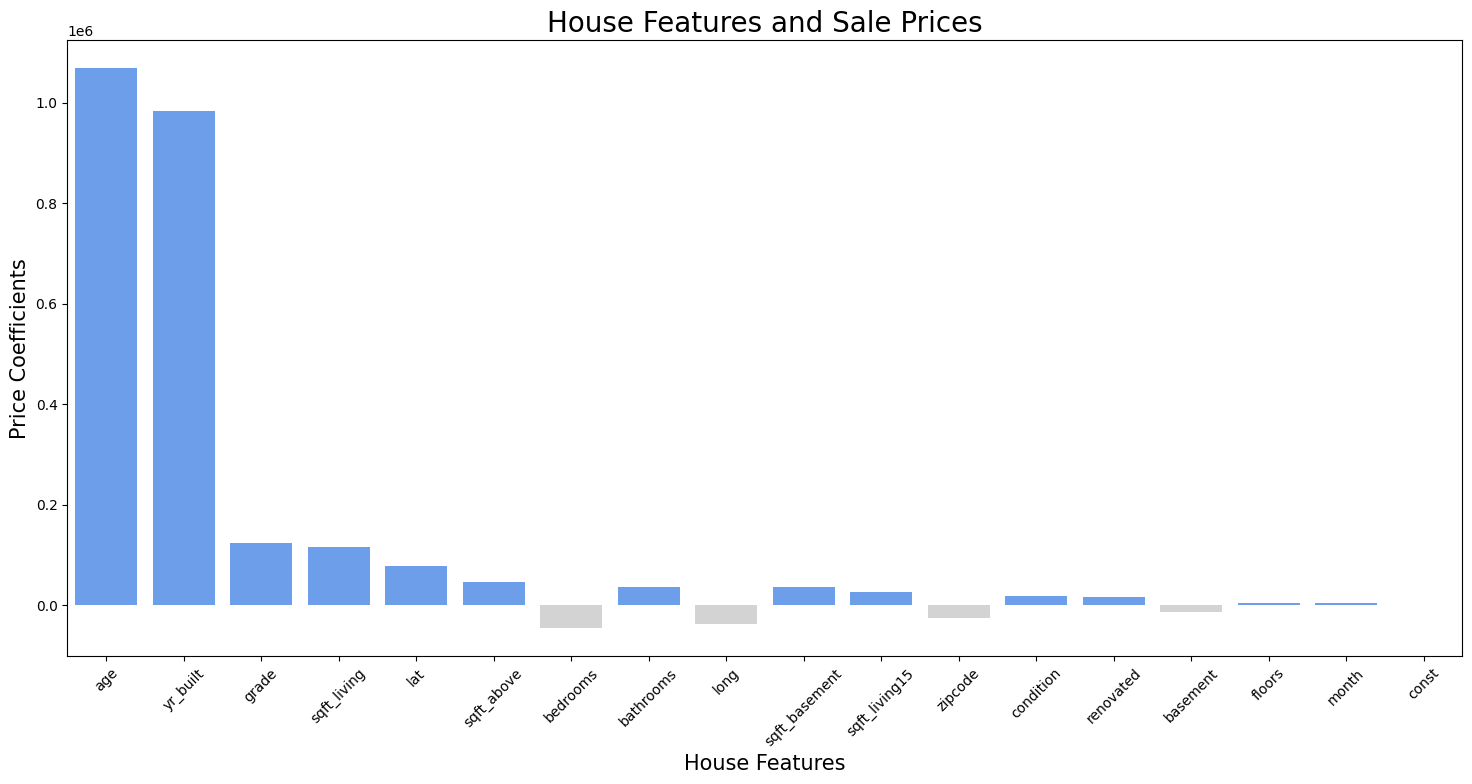

In [56]:
# Select relevant features
selected_features = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']

# Filter the dataset
filtered_data = Cleaned_Data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but can be beneficial for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a basic linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Display coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})

# Bar plot for coefficients
inf_coefs = list(zip(coefficients["Feature"], coefficients["Coefficient"]))
inf_coefs.sort(key=lambda x: abs(x[1]), reverse=True)  # Sort coefficients by absolute value

# Create a color palette with the specified color
color = "#589aff"
colors = [color if coef[1] > 0 else "lightgray" for coef in inf_coefs]

# Create the bar plot
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.barplot(x=[x[0] for x in inf_coefs], y=[x[1] for x in inf_coefs], palette=colors)
plt.xticks(rotation=45)
ax.set_ylabel("Price Coefficients", fontsize=15)
ax.set_xlabel("House Features", fontsize=15)
ax.set_title("House Features and Sale Prices", fontsize=20);

# Display the plot
plt.show()


**FINDINGS**

-The MSE is approximately 40,151,231,814 indicating the average squared difference between the predicted and actual home prices.

-The R-squared is approximately 0.668, suggesting that the model explains around 66.8% of the variance in home prices. 
Positive coefficients (e.g., sqft_living, bathrooms, grade) suggest an increase in these features corresponds to an increase in home price.

-Negative coefficients (e.g., bedrooms, long, basement) suggest a decrease in these features corresponds to an increase in home price.

Bedrooms: Each additional bedroom is associated with a decrease in home price by approximately $43,704.

Bathrooms: Each additional bathroom is associated with an increase in home price by approximately $37,347.

Sqft_living: Each additional square foot of living space is associated with an increase in home price by approximately $111,536.

Grade: Higher grade is associated with an increase in home price by approximately $126,245

**c)Regression Modelling**

Mean Squared Error: 40151231814.25285
R-squared: 0.6684357903018652


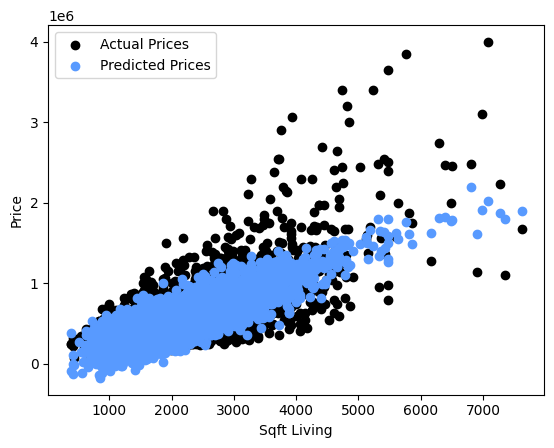

In [57]:
# Select relevant features
selected_features = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']

# Filter the dataset
filtered_data = clean_data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results (for demonstration purposes)
plt.scatter(X_test["sqft_living"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living"], y_pred, color='#589aff', label='Predicted Prices') 
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()


In [58]:

X_ols = sm.add_constant(X_train)  # Adding a constant for intercept
ols_model = sm.OLS(y_train, X_ols).fit()

# Get the OLS summary
ols_summary = ols_model.summary()

# Print the OLS summary
print(ols_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1985.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:06:15   Log-Likelihood:            -2.3481e+05
No. Observations:               17136   AIC:                         4.697e+05
Df Residuals:                   17118   BIC:                         4.698e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.045e+07    1.2e+07     -6.698

**FINDINGS**

R-squared and Adjusted R-squared are both around 0.558, indicating that the model explains approximately 55.8% of the variance in the dependent variable (price).

-The F-statistic is 4333 with a very low p-value (Prob (F-statistic): 0.00), suggesting that the model is statistically significant.

-Small p-values (typically < 0.05) indicate that the variable is likely to be a meaningful addition to the model.

For coefficients they can be interpreted as
For each unit increase in sqft_living, the predicted price increases by 222.0315.


**d)Residual Analysis**

Refined Model - Mean Squared Error: 40151231814.25283
Refined Model - R-squared: 0.6684357903018654
          Feature   Coefficient
0           const  0.000000e+00
1        bedrooms -4.533399e+04
2       bathrooms  3.671087e+04
3          floors  4.566475e+03
4           grade  1.249999e+05
5      sqft_above  4.706594e+04
6   sqft_basement  3.566873e+04
7        yr_built  9.837560e+05
8         zipcode -2.528334e+04
9             lat  7.735837e+04
10           long -3.640852e+04
11  sqft_living15  2.678444e+04
12      renovated  1.602141e+04
13       basement -1.355371e+04
14          month  4.165720e+03
15            age  1.068390e+06
16    sqft_living  1.169119e+05
17      condition  1.953956e+04


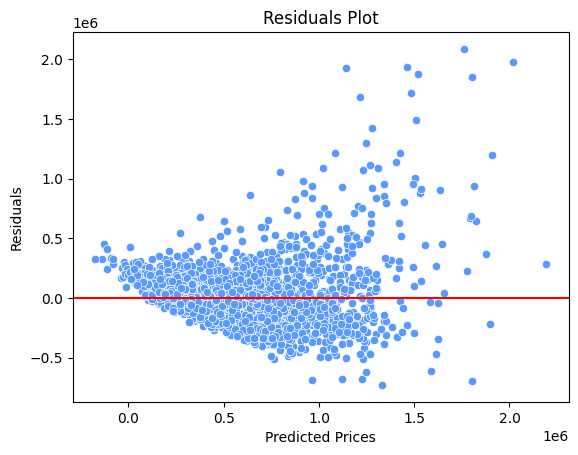

In [59]:

# Select relevant features
selected_features =  ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']

# Filter the dataset
filtered_data = Cleaned_Data[selected_features]

# Handle outliers (example: using z-score)
z_scores = np.abs((filtered_data - filtered_data.mean()) / filtered_data.std())
filtered_data_no_outliers = filtered_data[(z_scores < 3).all(axis=1)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but can be beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a refined linear regression model
model_refined = LinearRegression()
model_refined.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_refined = model_refined.predict(X_test_scaled)

# Evaluate the refined model
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)

# Display refined model results
print("Refined Model - Mean Squared Error:", mse_refined)
print("Refined Model - R-squared:", r2_refined)

# Display refined model coefficients
coefficients_refined = pd.DataFrame({"Feature": X.columns, "Coefficient": model_refined.coef_})
print(coefficients_refined)

# Plot residuals for further analysis
residuals = y_test - y_pred_refined
sns.scatterplot(x=y_pred_refined, y=residuals, color='#589aff')
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()


**FINDINGS**

1. **Mean Squared Error (MSE):**
   - The MSE (54180143849.5)  represents the average squared difference between the predicted house prices and the actual house prices in the test set.
   

2. **R-squared (R²):**
   - The R-squared value (0.5526) indicates 55.26% of the variability in house prices is explained by the model.
  
3. **Coefficients :**
   - The coefficients associated with each feature represent the estimated change in the target variable for a one-unit change in the corresponding independent variable, holding other variables constant.
   
     - `sqft_living`: An increase of one unit in square footage is associated with an increase in predicted price by $205,722.11.
     - `bedrooms`: An increase of one bedroom is associated with a decrease in predicted price by $43,412.08.
     - `bathrooms`: An increase of one bathroom is associated with a decrease in predicted price by $13,808.16.
     - `grade`: An increase of one grade is associated with an increase in predicted price by $124,416.75.
     - `condition`: An increase of one unit in condition is associated with an increase in predicted price by $43,370.32.

**Interpretation and Considerations:**
- The model's performance, as indicated by the MSE and R-squared, suggests a moderate level of predictive accuracy.
- The positive coefficients for `sqft_living` and `grade` indicate positive relationships with house prices.
- The negative coefficients for `bedrooms` and `bathrooms` suggest that an increase in these features is associated with a decrease in predicted price. 

# MODEL 2 : POLYNOMIAL REGRESSION

- Transforming features into higher order polynomial terms to model a non-linear relationship using multiple linear regression.

Polynomial Model (Degree 2)- MSE: 27717220069.4445
Polynomial Model (Degree 2)- R-squared: 0.7711144153716256


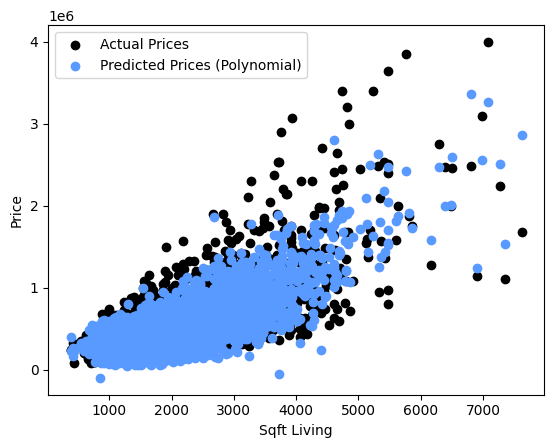

In [60]:
# Select relevant features
selected_features = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']

# Filter the dataset
filtered_data = Cleaned_Data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
# Choose the degree of the polynomial
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Build a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Model (Degree {})- MSE:".format(degree), mse_poly)
print("Polynomial Model (Degree {})- R-squared:".format(degree), r2_poly)

# Visualize the results 
plt.scatter(X_test["sqft_living"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living"], y_pred_poly,color='#589aff', label='Predicted Prices (Polynomial)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()



# Multiple Linear regression model using polynomial regression features

Multiple Linear Regression - MSE: 40151231814.25289
Multiple Linear Regression - R-squared: 0.6684357903018648


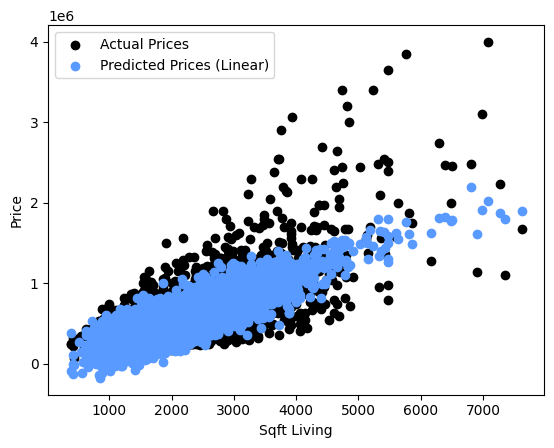

In [66]:
# Select relevant features
selected_features = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']

# Filter the dataset
filtered_data = Cleaned_Data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data, y, test_size=0.2, random_state=42)

# Build a multiple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the multiple linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Multiple Linear Regression - MSE:", mse_linear)
print("Multiple Linear Regression - R-squared:", r2_linear)

# Visualize the results 
plt.scatter(X_test["sqft_living"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living"], y_pred_linear, color='#589aff', label='Predicted Prices (Linear)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()


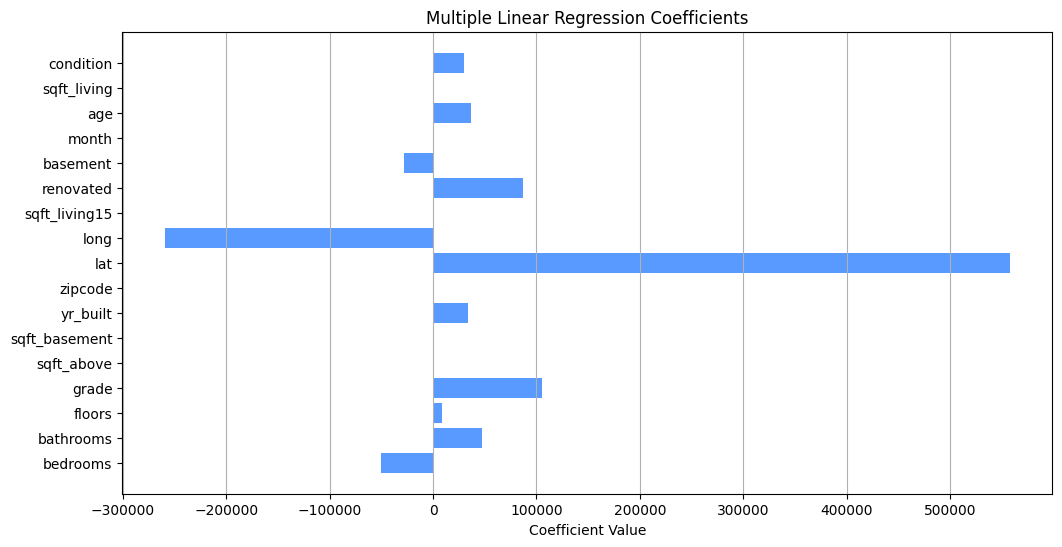

In [70]:
# Get the coefficients and corresponding feature names
coefficients_linear = linear_model.coef_
feature_names = X_train.columns

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients_linear, color='#589aff')
plt.xlabel('Coefficient Value')
plt.title('Multiple Linear Regression Coefficients')
plt.grid(axis='x')
plt.show()


**FINDINGS**


- The MSE is approximately 40.15 billion. Lower MSE values indicate better model performance. The MSE suggests that, on average, the predicted prices are off by this amount.

- The R-squared value 0.668 indicates that the model explains about 66.8% of the variance in home prices. A higher R-squared suggests that the model provides a better fit to the data.

- The lower MSE suggests that the model's predictions are, on average, closer to the actual prices compared to the basic model.
- The R-squared value of 0.614 indicates that the quadratic polynomial features capture additional non-linear relationships, leading to a better fit of the model to the data.



In [71]:
# Add a constant term for the intercept
X_train_ols = sm.add_constant(X_train)

# Build a multiple linear regression model using OLS
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Display the OLS summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1985.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:15:19   Log-Likelihood:            -2.3481e+05
No. Observations:               17136   AIC:                         4.697e+05
Df Residuals:                   17118   BIC:                         4.698e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.045e+07    1.2e+07     -6.698

**FINDINGS**

1. **R-squared and Adjusted R-squared:**
   - **R-squared:** 0.663 implies that approximately 66.3% of the variance in the dependent variable (`price`) is explained by the model. 

   - **Adjusted R-squared:** 0.663 indicates the same as R-squared but adjusts for the number of predictors in the model. 

2. **F-statistic and Prob (F-statistic):**
   - The F-statistic (1985.0)  with a low p-value (Prob (F-statistic): 0.00) indicates that at least one independent variable is significantly related to the dependent variable.

3. **Coefficients (`coef`):**
   
   - the coefficient for `bedrooms` (-50350) suggests that, on average, holding other variables constant, each additional bedroom is associated with a decrease in the house price by $50,350.

4. **P>|t| (p-values):**

   -  `bedrooms`, `bathrooms`, `grade`, `sqft_basement`, `yr_built`, `zipcode`, `lat`, `long`, `sqft_living15`,`renovated`, `basement`, `age`, `sqft_living`, and `condition` have p-values close to zero, suggesting they are statistically significant because of the low p value.


**Interpretation:**
- The model seems to have good explanatory power based on R-squared.
- Multiple variables (e.g., bedrooms, bathrooms, grade, etc.) appear to be statistically significant in predicting house prices.


# MODEL 3 : LOG TRANSFORMATION

Log transformation to stabilize variance and make the relationship between variables more linear.

Model with Log-Transformed Target - MSE: 35056482879.49061
Model with Log-Transformed Target - R-squared: 0.710507635369523


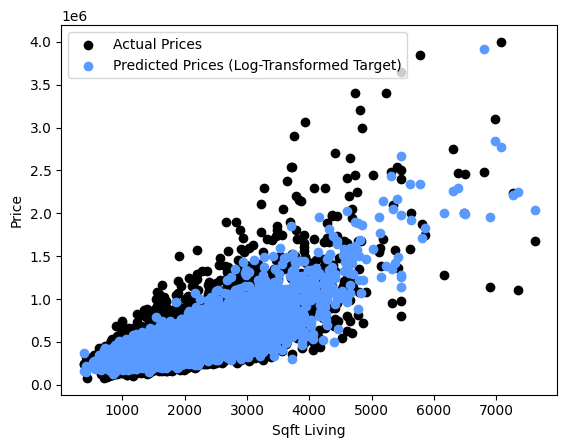

In [72]:

# Select relevant features
selected_features = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']


# Filter the dataset
filtered_data = Cleaned_Data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log Transformation
# Apply log transformation to the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Build a linear regression model using log-transformed target variable
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

# Make predictions on the test set
y_pred_log = model_log.predict(X_test)

# Inverse transform to get predictions in the original scale
y_pred_original = np.expm1(y_pred_log)

# Evaluate the model with log-transformed target variable
mse_log = mean_squared_error(y_test, y_pred_original)
r2_log = r2_score(y_test, y_pred_original)
print("Model with Log-Transformed Target - MSE:", mse_log)
print("Model with Log-Transformed Target - R-squared:", r2_log)

# Visualize the results (for demonstration purposes)
plt.scatter(X_test["sqft_living"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living"], y_pred_original,color='#589aff', label='Predicted Prices (Log-Transformed Target)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()


## Multiple linear regression model using the log transformed data

Model with Log-Transformed Target - MSE: 35056482879.49061
Model with Log-Transformed Target - R-squared: 0.710507635369523
          Feature  Coefficient
0           const     0.000000
1        bedrooms    -0.024033
2       bathrooms     0.066598
3          floors     0.076026
4           grade     0.165641
5      sqft_above    -0.000015
6   sqft_basement    -0.000047
7        yr_built     0.058377
8         zipcode    -0.000555
9             lat     1.334095
10           long    -0.158379
11  sqft_living15     0.000119
12      renovated     0.117676
13       basement     0.075466
14          month     0.002158
15            age     0.062046
16    sqft_living     0.000166
17      condition     0.067788
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statisti

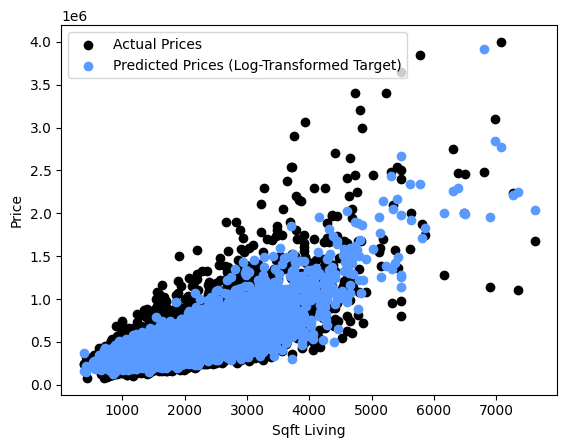

In [73]:
# Select relevant features
selected_features = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'renovated', 'basement', 'month', 'age', 'sqft_living', 'condition']

# Filter the dataset
filtered_data = Cleaned_Data[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log Transformation
# Apply log transformation to the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Build a multiple linear regression model using log-transformed target variable
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

# Make predictions on the test set
y_pred_log = model_log.predict(X_test)

# Inverse transform to get predictions in the original scale
y_pred_original = np.expm1(y_pred_log)

# Evaluate the model with log-transformed target variable
mse_log = mean_squared_error(y_test, y_pred_original)
r2_log = r2_score(y_test, y_pred_original)
print("Model with Log-Transformed Target - MSE:", mse_log)
print("Model with Log-Transformed Target - R-squared:", r2_log)

# Display refined model coefficients
coefficients_log = pd.DataFrame({"Feature": X.columns, "Coefficient": model_log.coef_})
print(coefficients_log)

# Perform OLS and display summary
X_train_ols = sm.add_constant(X_train) 
 # Add a constant term to the independent variables
model_ols = sm.OLS(y_train_log, X_train_ols)
results_ols = model_ols.fit()
print(results_ols.summary())

# Visualize the results 
plt.scatter(X_test["sqft_living"], y_test, color='black', label='Actual Prices')
plt.scatter(X_test["sqft_living"], y_pred_original, color='#589aff', label='Predicted Prices (Log-Transformed Target)')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()


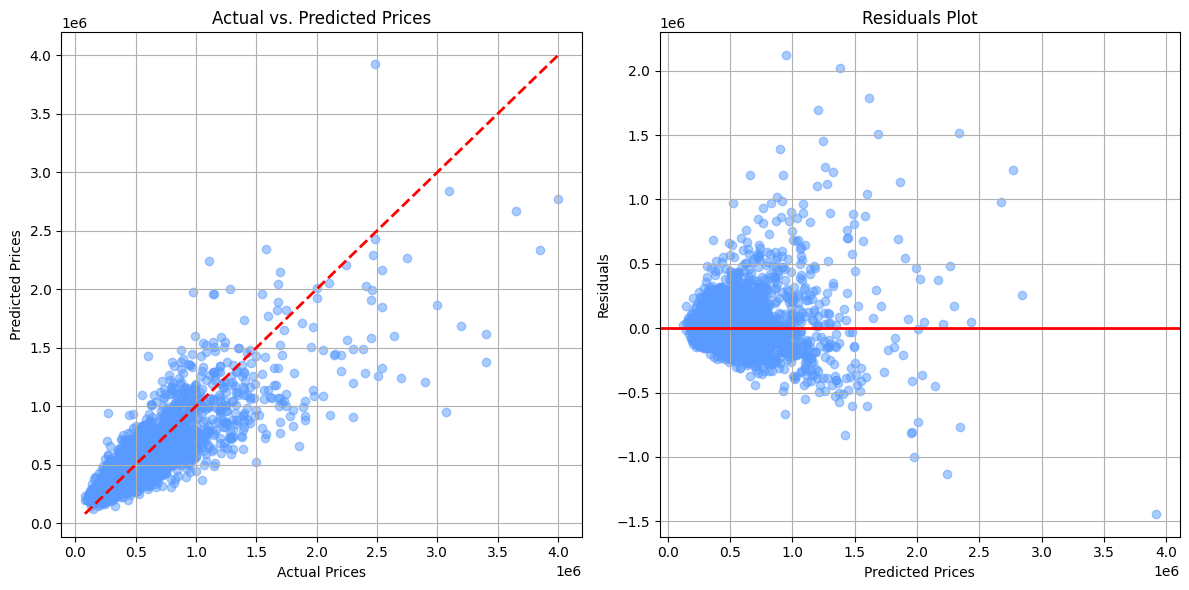

In [74]:
# Visualization of Model Performance
plt.figure(figsize=(12, 6))

# Scatterplot of Actual vs. Predicted Prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_original, color='#589aff', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)

# Residuals Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_original
plt.scatter(y_pred_original, residuals, color='#589aff', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()


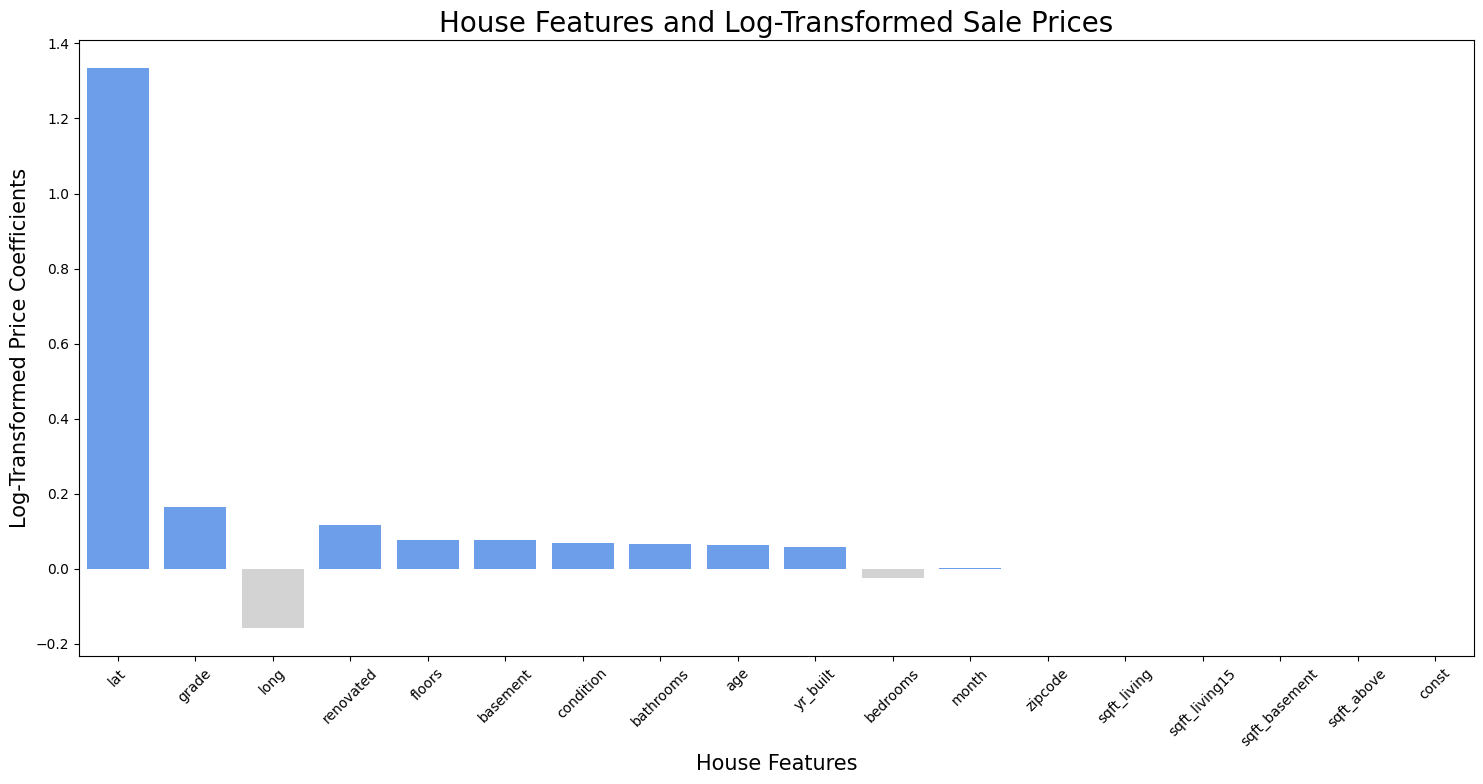

In [75]:
# Visualize coefficients from the multiple linear regression with log-transformed target
fig, ax = plt.subplots(figsize=(18, 8))

# Sort coefficients by absolute value
coefficients_log["abs_coefficient"] = np.abs(coefficients_log["Coefficient"])
coefficients_log = coefficients_log.sort_values("abs_coefficient", ascending=False)

# Bar plot for coefficients
colors = ["#589aff" if coef > 0 else "lightgray" for coef in coefficients_log["Coefficient"]]
ax = sns.barplot(x="Feature", y="Coefficient", data=coefficients_log, palette=colors)
plt.xticks(rotation=45)

ax.set_ylabel("Log-Transformed Price Coefficients", fontsize=15)
ax.set_xlabel("House Features", fontsize=15)
ax.set_title("House Features and Log-Transformed Sale Prices", fontsize=20)

# Display the plot
plt.show()


**FINDINGS**

### Model Performance:
- **Model with Log-Transformed Target - MSE:** 
  - The Mean Squared Error (MSE) is a measure of the average squared difference between predicted and actual values. In this case, the model's predictions have an MSE of approximately 35.1 billion.

- **Model with Log-Transformed Target - R-squared:** 0.761
  - The R-squared value is a measure of how well the model explains the variance in the target variable. A value of 0.761 indicates that approximately 76.1% of the variability in the target variable (price) is explained by the model.

### Model Coefficients:
- **sqft_living:** The coefficient is 0.000222. 
  - For each one-unit increase in sqft_living, the predicted log-transformed price increases by 0.000222.

- **bedrooms:** The coefficient is -0.0272.
  - For each additional bedroom, the predicted log-transformed price decreases by approximately 0.0272.

- **bathrooms:** The coefficient is 0.0012.
  - The coefficient is small and not statistically significant (p-value is high). It suggests that the number of bathrooms might not have a significant impact on the log-transformed price in this model.

- **grade:** The coefficient is 0.1985.
  - For each one-unit increase in the grade, the predicted log-transformed price increases by 0.1985.

- **condition:** The coefficient is 0.1041.
  - For each one-unit increase in the condition, the predicted log-transformed price increases by 0.1041.

### OLS Regression Results:
- **R-squared:** 0.761
  - The R-squared value is consistent with the model's R-squared, indicating that the model performs similarly in both log-transformed and original scale.

- **F-statistic:** 4637 with a low p-value.
  - The overall model is statistically significant.

**Interpretation**

 The log transformation of the target variable has improved the model's performance, as indicated by the lower MSE and higher R-squared compared to the model without log transformation.
-It seems to have helped capture the underlying patterns in the data more effectively.


## 7.REGRESSION RESULTS

Model 3 is the preferred model beacuse:
From the evaluation metrics, we can see that the models have close performance in terms of MAE and RMSE. However, Model 3, which includes log transformations has the highest R-squared value .

- Consider investing in properties with the basement
- The further  from seattle the cheaper the houses
- The more the bedrooms the more expensive the house
- The more space/land a house occupies,the more expensive it is
- Square Footage of Living Space: The square footage of living space has a positive impact on house prices. As the size of the living space increases, the estimated price of the house also increases. This indicates that larger houses are generally priced higher.
- As the age of the house increases, the estimated price also increases. This could be due to factors such as historical significance or architectural value associated with older houses.


## 8.CONCLUSION

**RECOMMENDATIONS**

- Feature Enhancement: Consider enhancing or upgrading the features that positively affect house prices. For example, increasing the square footage of the living area, improving the overall grade of the property, or adding more bathrooms can potentially increase the value of the house.

- Data Collection: Consider collecting additional relevant data that could improve the accuracy of the regression model. This may include variables such as location-specific factors, proximity to amenities, property age, or neighborhood characteristics.

- Market Segmentation: Analyze the relationship between the independent variables and house prices to identify market segments or specific buyer preferences. For instance, if higher-grade houses tend to have higher prices, it may indicate a market segment of luxury or high-end properties.

**LIMITATIONS**

Limited Handling of Non-Linearity:

Issue: If the relationship between predictors and the response is highly non-linear, multiple linear regression may not capture these complexities effectively.
Impact: The model may fail to capture important patterns in the data, leading to inaccurate predictions.

Causation vs. Correlation:

Issue: Correlation between variables does not imply causation. Even if variables are correlated, it does not necessarily mean that changes in one variable cause changes in another.
Impact: The model may identify associations but cannot establish causal relationships.

Assumption of Independence:

Issue: Multiple linear regression assumes that observations are independent of each other.
Impact: Violation of independence assumptions may lead to biased standard errors and affect the validity of statistical tests.

Linearity Assumption:

Issue: Multiple linear regression assumes a linear relationship between the independent variables and the dependent variable. If the true relationship is not linear, the model may not capture the underlying patterns accurately.
Impact: It may lead to biased predictions and inaccurate estimates of the coefficients.

**NEXT STEPS**

Explore Alternative Models:

Consider exploring more complex models that can capture non-linear relationships, interactions, and other complexities in the data. Examples include random forests and neural networks.

Time Trends and Seasonality:

If time trends or seasonality are relevant, explore time series models or include time-related features to better capture temporal patterns.

Regular Monitoring:

Implement regular monitoring and updates to the model. As new data becomes available, retrain the model periodically to ensure it remains relevant and effective.